# **MarePiù - an analysis of B2C market opportunities**

Marepiù is a well-established company in the seafood industry, primarily operating in the B2B (wholesale) market. This study was conducted to analyze the market and evaluate the feasibility of entering the B2C sector, with the aim of understanding consumer preferences and needs. To achieve this, a consumer survey was conducted to gather data on seafood consumption patterns, shopping habits, and demographic characteristics. The collected data was analyzed using statistical models to identify key market trends and consumer expectations. The findings of this analysis will provide crucial support for the company’s strategic decisions, helping to determine whether—and how—Marepiù’s seafood products can be successfully introduced to the retail sector.

## **Segmentation survey**
A first general questionnaire was conducted to analyze the overall consumer market and identify potential target segments for the company’s entry into the B2C market. 
The survey aimed to gather insights into consumer habits, behaviors, and needs within the seafood category, serving as a preliminary step before narrowing the focus on specific products or attributes.
To ensure comprehensive data collection, the survey was structured with no optional questions, avoiding any missing values. Additionally, an “Other: …” answer was included in every multiple-choice question to allow respondents to express ideas not covered by the predefined options.
The questionnaire was structured as follows: 

**1. Demographic Data**
General questions about demographic characteristics (e.g., age, gender, geographical location) were included to profile consumers.

**2. Consumption Habits**
This section explored frequency of seafood consumption, types of seafood most frequently consumed (e.g., fresh, frozen, or processed), average time spent on meal preparation during the day.
From these responses, potential interest in frozen seafood products can be hypothesized. For instance:

-	Consumers who spend significant time preparing meals might not feel the need for ready-to-cook frozen alternatives.

-	On the other hand, consumers with less time for meal preparation might represent a more receptive audience for frozen seafood products.

**3. Purchasing Behavior**
This section explored shopping preferences and habits (e.g., purchasing channels, price consumers are willing to spend).
These questions aimed to uncover actionable information about the most appropriate distribution strategies for frozen seafood products.

**4. Product Preferences**
Questions about key product attributes such as freshness, nutritional balance, price, speed and simplicity of preparation, were designed to assess the attractiveness of the company’s potential offerings in the consumer market and identify which product features resonate most with the target audience. 

Analyzing the responses provides valuable insights into the seafood market, enabling the identification of key trends and effective audience segmentation. This first general survey sets the stage for more focused studies (e.g., conjoint analysis) by highlighting critical factors like the importance of convenience or the role of speed and simplicity of cooking in consumer decisions.

We concluded with a total of **347 respondents** and **28 questions**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats
from statsmodels.stats import weightstats as st
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from factor_analyzer.factor_analyzer import calculate_kmo

## **1 - Data loading and description**
The dataset consists of 347 rows and 28 columns, each representing a specific question from the survey.

In [2]:
raw_data = pd.read_csv("data_1.csv")
raw_data.head()

Informazioni cronologiche Qual è la tua età? In che regione vivi?  \
0  2024/11/24 11:38:10 AM CET         18-25 anni            Lombardia   
1  2024/11/24 11:39:37 AM CET         18-25 anni            Lombardia   
2  2024/11/24 11:39:51 AM CET         18-25 anni               Veneto   
3  2024/11/24 11:48:20 AM CET         26-35 anni            Lombardia   
4  2024/11/24 11:49:38 AM CET         60-70 anni            Lombardia   

                            In che zona abiti?  \
0                                 Centro città   
1                                 Centro città   
2                                 Centro città   
3                              Periferia città   
4  Esterno (es. campagna/costiera/montagna...)   

  Con quale genere ti identifichi?  \
0                             Uomo   
1                             Uomo   
2                            Donna   
3                            Donna   
4                            Donna   

  Da quanti componenti è formato il tuo nucleo familiare?  \
0                                                 4+        
1                                                2-3        
2                                                  1        
3                                                2-3        
4                                                  1        

  Qual è la tua professione? Consumi prodotti ittici?  \
0                   Studente                       Si   
1                 Lavoratore                       Si   
2                   Studente                       Si   
3                 Lavoratore                       Si   
4                 Lavoratore                       Si   

  Per quale motivo non consumi prodotti ittici?  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  Quanto spesso consumi prodotti ittici?  ...  \
0                  Una volta a settimana  ...   
1                  Una volta a settimana  ...   
2                  Una volta a settimana  ...   
3                Una o due volte al mese  ...   
4                Una o due volte al mese  ...   

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]  \
0                          3 - Mediamente importante                                                   
1                          4 - Abbastanza importante                                                   
2                          3 - Mediamente importante                                                   
3                                2 - Poco importante                                                   
4                               5 - Molto importante                                                   

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]  \
0                                2 - Poco importante                                                     
1                          4 - Abbastanza importante                                                     
2                                2 - Poco importante                                                     
3                          3 - Mediamente importante                                                     
4                               5 - Molto importante                                                     

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]  \
0                          4 - Abbastanza importante                                                             
1                          3 - Mediamente importante                                                             
2                               5 - Molto importante                                                             
3    

After asking personal questions, such as age range or region of residence, one of the first questions of the survey was, "Do you consume fish products?" If the respondent answered "NO," they were directed to the final part of the survey, which asked about motivations and opportunities.  

In [3]:
data_no = raw_data[raw_data['Consumi prodotti ittici?']=='No']
len(data_no)

39

In [4]:
no_fish = len(data_no)/len(raw_data)*100
print(f"Percentage of people who don't eat fish (according to our data) is {no_fish:.2f}%")

Percentage of people who don't eat fish (according to our data) is 11.24%


While we acknowledge that our sample is not perfectly representative of the general population, we can infer, based on the collected data, that approximately one-tenth of the population could be excluded a priori as potential customers. This is due to their complete abstention from consuming fish products, regardless of influencing factors such as price, freshness, or availability. This insight is valuable for refining target market strategies and focusing resources on segments with higher potential.

To strengthen this analysis and validate the assumption, we investigated the specific reasons behind this group’s decision to avoid fish products. Understanding these motivations provides a more comprehensive picture of the consumer landscape and offers indirect insights into potential barriers or opportunities for expanding market reach. By analyzing these responses, we aim to identify whether their abstention is driven by personal preferences, dietary restrictions, ethical considerations, or other factors, thus enriching the overall interpretation of the sample under study.

In [5]:
response_distribution = raw_data['Per quale motivo non consumi prodotti ittici?'].value_counts()
response_distribution

Per quale motivo non consumi prodotti ittici?
Questione di gusti                                20
Sono vegetariano/vegano                            7
Hanno un prezzo troppo alto                        3
Questione di gusti;Hanno un prezzo troppo alto     2
Abitudine                                          1
Non so cosa sono i prodotti ittici                 1
Non ci penso non ci faccio caso                    1
Sono vegetariano/vegano;Questione di gusti         1
Sono allergica                                     1
Questione di gusti;                                1
Non mi piacciono                                   1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------------

After this brief preliminary analysis, for the segmentation analysis, we filtered the data to include only respondents who consume seafood products.

In [6]:
data = raw_data[raw_data['Consumi prodotti ittici?']=='Si']
data.head()

Informazioni cronologiche Qual è la tua età? In che regione vivi?  \
0  2024/11/24 11:38:10 AM CET         18-25 anni            Lombardia   
1  2024/11/24 11:39:37 AM CET         18-25 anni            Lombardia   
2  2024/11/24 11:39:51 AM CET         18-25 anni               Veneto   
3  2024/11/24 11:48:20 AM CET         26-35 anni            Lombardia   
4  2024/11/24 11:49:38 AM CET         60-70 anni            Lombardia   

                            In che zona abiti?  \
0                                 Centro città   
1                                 Centro città   
2                                 Centro città   
3                              Periferia città   
4  Esterno (es. campagna/costiera/montagna...)   

  Con quale genere ti identifichi?  \
0                             Uomo   
1                             Uomo   
2                            Donna   
3                            Donna   
4                            Donna   

  Da quanti componenti è formato il tuo nucleo familiare?  \
0                                                 4+        
1                                                2-3        
2                                                  1        
3                                                2-3        
4                                                  1        

  Qual è la tua professione? Consumi prodotti ittici?  \
0                   Studente                       Si   
1                 Lavoratore                       Si   
2                   Studente                       Si   
3                 Lavoratore                       Si   
4                 Lavoratore                       Si   

  Per quale motivo non consumi prodotti ittici?  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  Quanto spesso consumi prodotti ittici?  ...  \
0                  Una volta a settimana  ...   
1                  Una volta a settimana  ...   
2                  Una volta a settimana  ...   
3                Una o due volte al mese  ...   
4                Una o due volte al mese  ...   

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]  \
0                          3 - Mediamente importante                                                   
1                          4 - Abbastanza importante                                                   
2                          3 - Mediamente importante                                                   
3                                2 - Poco importante                                                   
4                               5 - Molto importante                                                   

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]  \
0                                2 - Poco importante                                                     
1                          4 - Abbastanza importante                                                     
2                                2 - Poco importante                                                     
3                          3 - Mediamente importante                                                     
4                               5 - Molto importante                                                     

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]  \
0                          4 - Abbastanza importante                                                             
1                          3 - Mediamente importante                                                             
2                               5 - Molto importante                                                             
3    

In [7]:
print(f"Number of people who eat fish products: {len(data)}")
print(f"Percentage: {len(data)/len(raw_data)*100:.2f}%")

Number of people who eat fish products: 308
Percentage: 88.76%


308 people eat fish, which is almost 90% of our sample. Of these, we want to understand their needs and habits in order to identify similar behaviors within groups of the population.

To conclude data pre-processing, we set an **index column** corresponding to ID of respondent.

In [8]:
data['respondent_id'] = data.index
data = data.set_index('respondent_id')

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\654717838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['respondent_id'] = data.index


## **2 - Segmentation**

### **2.1. Data**
The dataframe "_segmentation_data_" consists of a selection of columns (17 to 28) from the original dataset. They contain the importance ratings assigned from each respondent to various product characteristics. The attributes we decided to take into account are the following:
- **freshness**: importance of the freshness of the purchased product.
- **origin**: importance of the origin of the raw materials.
- **cooking_speed**: importance of the speed of preparation.
- **cooking_simplicity**: importance of the simplicity of preparation.
- **nutritional_balance**: importance of the nutritional balance of the product.
- **innovative_products**: importance of the presence of new/innovative products.
- **unprocessed**: importance of the product being natural/minimally processed.
- **price**: importance of the price.
- **single_portion**: importance of the availability of single-portion products.
- **sustainable_sources**: importance of the ingredients coming from sustainable sources (e.g., certified fishing).
- **low_impact_environment**: importance of low environmental impact in production.
- **sustainable_packaging**: importance of eco-friendly packaging.

The responses range from 1 to 5, where 1 represents "Not interested" and 5 represents "Very important".

In [9]:
segmentation_data = data.iloc[:, 16:28]
segmentation_data

Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]  \
respondent_id                                                                                                                
0                                      4 - Abbastanza importante                                                             
1                                           5 - Molto importante                                                             
2                                           5 - Molto importante                                                             
3                                           5 - Molto importante                                                             
4                                           5 - Molto importante                                                             
...                                                          ...                                                             
341                                         5 - Molto importante                                                             
342                                    4 - Abbastanza importante                                                             
343                                         1 - Non mi interessa                                                             
344                                    4 - Abbastanza importante                                                             
345                                         5 - Molto importante                                                             

              Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]  \
respondent_id                                                                                                             
0                                      3 - Mediamente importante                                                          
1                                      3 - Mediamente importante                                                          
2                                      4 - Abbastanza importante                                                          
3                                      3 - Mediamente importante                                                          
4                                           5 - Molto importante                                                          
...                                                          ...                                                          
341                                         5 - Molto importante                                                          
342                                    3 - Mediamente importante                                                          
343                                         1 - Non mi interessa                                                          
344                                    4 - Abbastanza importante                                                          
345                                    4 - Abbastanza importante                                                          

              Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]  \
respondent_id                                                                                                      
0                                      3 - Mediamente importante                                                   
1                                      4 - Abbastanza importante                                                   
2                                      3 - Mediamente importante                                                   
3                                            2 - Poco importante                                                   
4                                           5 - Molto importante               

- We renamed columns with pre-specified and easier **column names** and mapped cell values to integers.

In [10]:
# rename columns
new_names = { 'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]' : 'freshness',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]': 'origin',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]' : 'cooking_speed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]' : 'cooking_simplicity',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]' : 'nutritional_balance',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]': 'innovative_products',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]' : 'unprocessed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]' : 'price',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]' : 'single_portion',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]' : 'sustainable_sources',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]' : 'low_impact_environment',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]' : 'sustainable_packaging'}

segmentation_data = segmentation_data.rename(columns=new_names)

# map textual responses to numerical values
response_mapping = {
    '1 - Non mi interessa': 1,
    '2 - Poco importante': 2,
    '3 - Mediamente importante': 3,
    '4 - Abbastanza importante': 4,
    '5 - Molto importante': 5
}

for column in segmentation_data.columns:
    segmentation_data[column] = segmentation_data[column].map(response_mapping)

segmentation_data.head()

freshness  origin  cooking_speed  cooking_simplicity  \
respondent_id                                                         
0                      4       3              3                   2   
1                      5       3              4                   4   
2                      5       4              3                   2   
3                      5       3              2                   3   
4                      5       5              5                   5   

               nutritional_balance  innovative_products  unprocessed  price  \
respondent_id                                                                 
0                                4                    1            2      5   
1                                3                    2            4      4   
2                                5                    2            3      4   
3                                4                    1            5      4   
4                                4                    2            5      5   

               single_portion  sustainable_sources  low_impact_environment  \
respondent_id                                                                
0                           2                    5                       4   
1                           4                    5                       5   
2                           4                    3                       3   
3                           1                    3                       3   
4                           5                    5                       5   

               sustainable_packaging  
respondent_id                         
0                                  4  
1                                  5  
2                                  3  
3                                  3  
4                                  5

- Check **null values**:

In [11]:
segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   freshness               308 non-null    int64
 1   origin                  308 non-null    int64
 2   cooking_speed           308 non-null    int64
 3   cooking_simplicity      308 non-null    int64
 4   nutritional_balance     308 non-null    int64
 5   innovative_products     308 non-null    int64
 6   unprocessed             308 non-null    int64
 7   price                   308 non-null    int64
 8   single_portion          308 non-null    int64
 9   sustainable_sources     308 non-null    int64
 10  low_impact_environment  308 non-null    int64
 11  sustainable_packaging   308 non-null    int64
dtypes: int64(12)
memory usage: 31.3 KB


- We computed some **metrics** of each attribute ...

In [12]:
segmentation_data.describe().style.format("{:.1f}")

... and **plotted** distribution to understand.

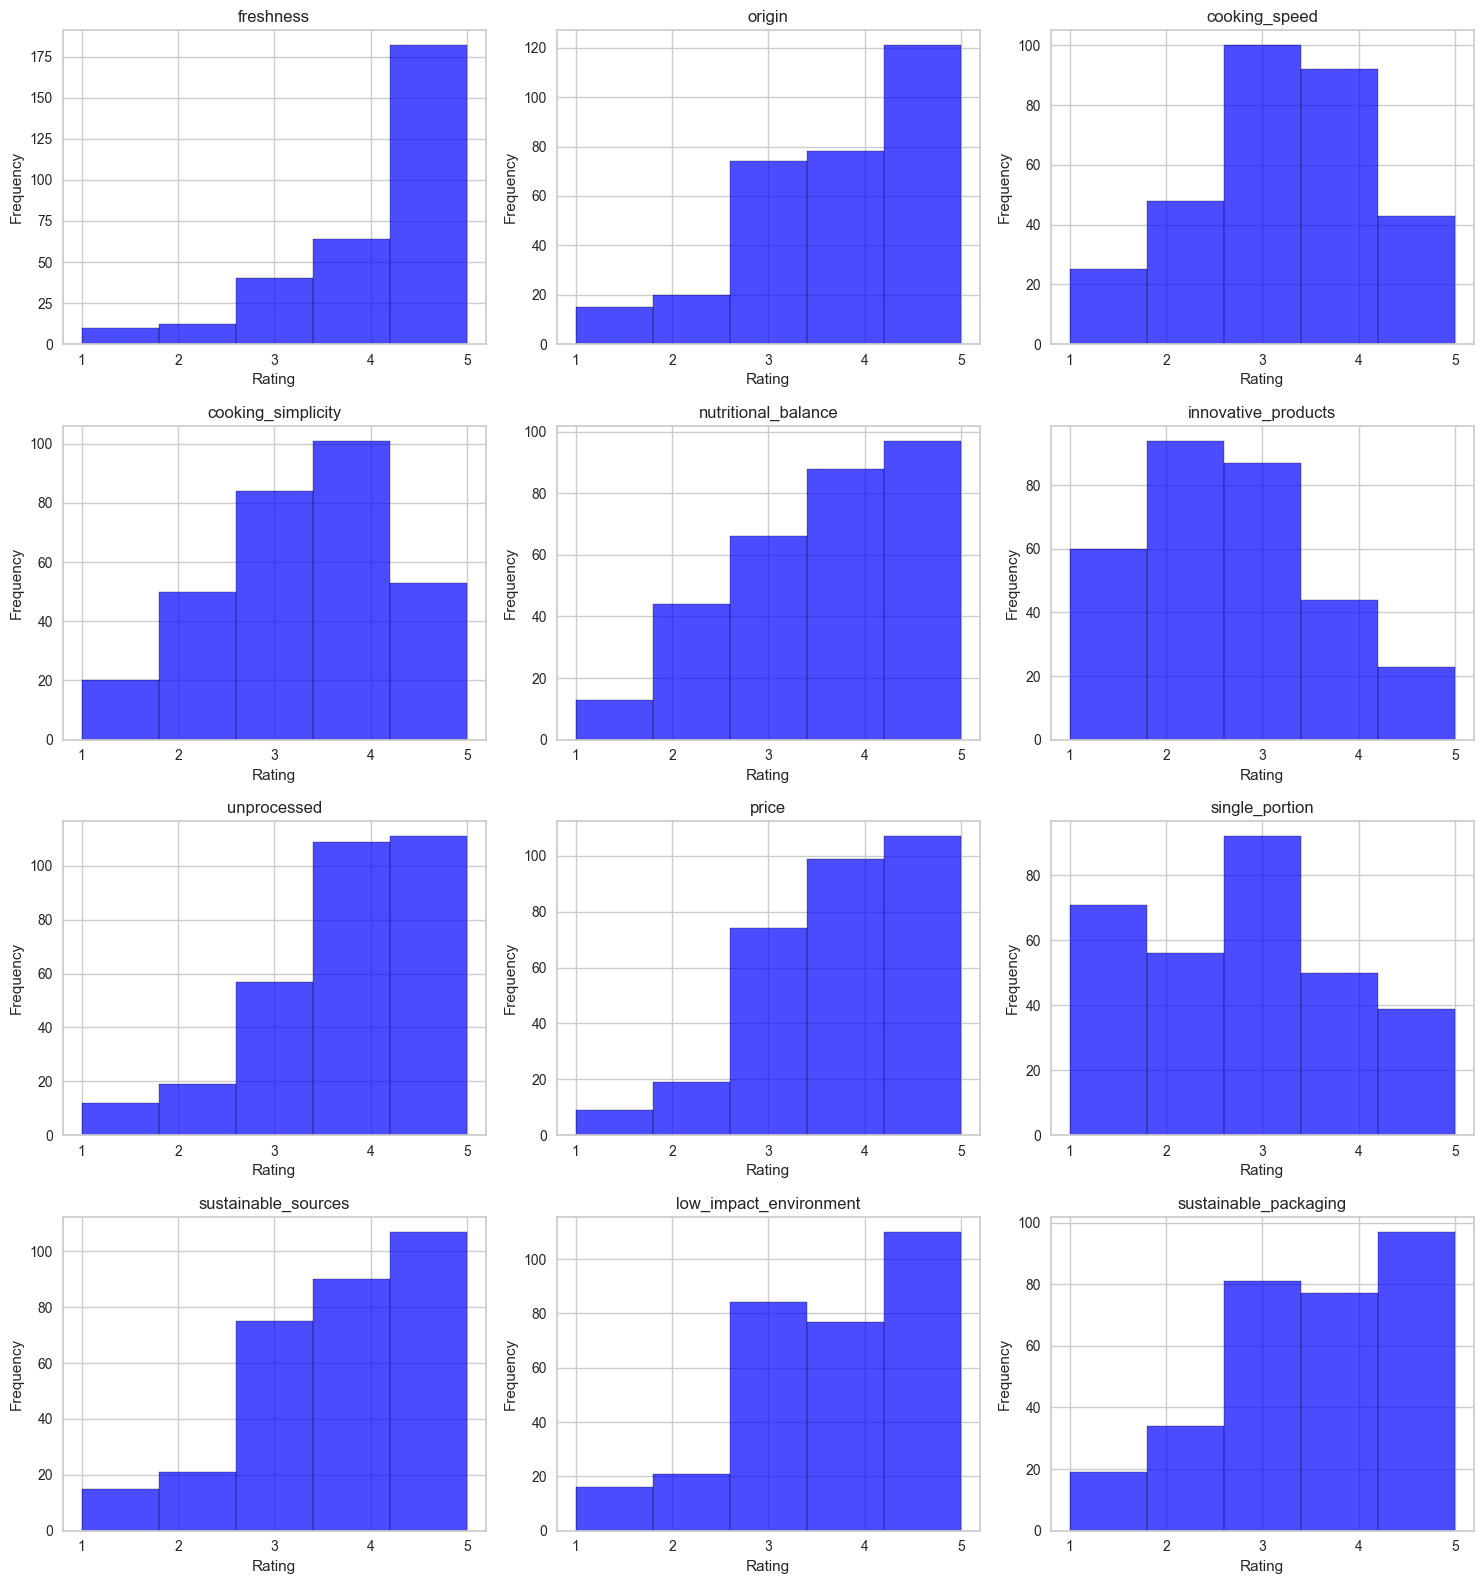

In [13]:
num_variables = len(segmentation_data.columns) 
num_rows = num_variables // 3 + (num_variables % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4), tight_layout=True)
axes = axes.flatten()

for index, column in enumerate(segmentation_data.columns):
    axes[index].hist(segmentation_data[column], bins=5, range=(1, 5), alpha=0.7, color='blue', edgecolor='black')
    axes[index].set_title(column)
    axes[index].set_xlabel('Rating')
    axes[index].set_ylabel('Frequency')
    axes[index].set_xticks(range(1, 6))

for i in range(index + 1, len(axes)):
    axes[i].axis('off')

plt.show()

The distributions reveal insights into the respondents' perceptions and preferences across different attributes. Overall, many attributes are skewed towards higher ratings (4 and 5), indicating that most respondents seem to have positive views on the various characteristics. However, there are some notable exceptions where responses are more balanced or spread across lower ratings, reflecting some areas where satisfaction may vary more.

- **Freshness:** Strong preference for high freshness, with the majority of respondents rating it 4 or 5 (246 total responses), suggesting that freshness is a crucial factor for seafood consumers.
- **Origin:** Similar to freshness, a significant portion of the respondents rated the origin of seafood positively (4 and 5), but there are more people rating it lower (1 and 2).
- **Cooking Speed:** Responses are more spread across the rating scale, with the highest concentration in the mid-range.
- **Cooking Simplicity:** The distribution is more positively skewed with a high number of respondents rating simplicity at 4 and 5.
- **Nutritional Balance:** Many respondents rating it 4 or 5.
- **Innovative Products:** The distribution is more spread out, with the highest frequencies at 2 and 3, indicating a moderate interest in innovative products. This may indicate that while innovation in seafood products is appreciated, it might not be a top priority for most respondents. This should be considerate if a company want to sell a new product, which may be less 'traditional'.
- **Unprocessed:** There is a strong preference for unprocessed seafood, with a high concentration of ratings at 4 and 5.
- **Price:** Similar to cooking speed, responses for price are more balanced across the scale.
- **Single Portion:** The distribution is skewed towards 1 and 3. The demand for single-portion seafood products seems to vary, with some respondents being indifferent.
- **Sustainable Sources:** Many respondents rate sustainable sourcing highly (4 and 5), with the majority seeming to prioritize sustainability.
- **Low Impact Environment:** Similar to sustainable sourcing, most respondents rated low environmental impact positively (4 and 5), reflecting strong concern for environmental factors.
- **Sustainable Packaging:** The majority of responses are positive, with most ratings clustered around 3 to 5, showing concern for sustainability in packaging.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\356035379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette='Set2')


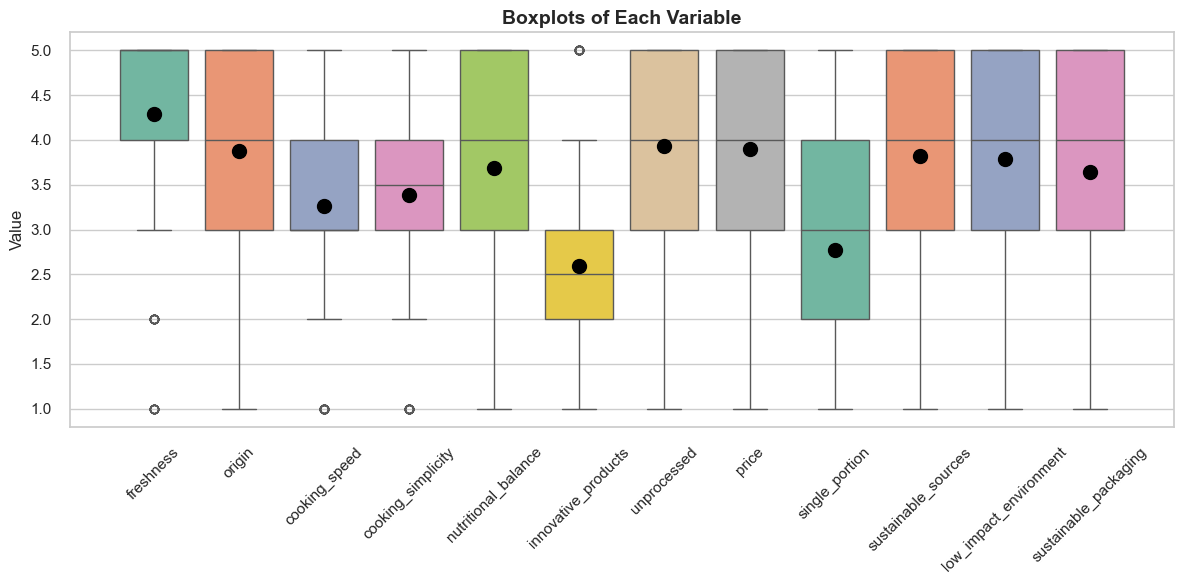

In [15]:
sns.set(style="whitegrid")

df_melted = segmentation_data.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted, palette='Set2')
means = segmentation_data.mean()

for i, mean in enumerate(means):
    plt.scatter(i, mean, color='black', label='Mean' if i == 0 else "", s=100, zorder=10)
    
plt.title('Boxplots of Each Variable', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplots provide a clear picture of how respondents perceive different attributes related to seafood products. 
Attributes like freshness and origin stand out with consistently high ratings, indicating they are critical factors for most consumers, as reflected by their tight distributions around 4 and 5. Sustainability-related aspects also show strong preferences, highlighting the importance of environmental consciousness. 
On the other hand, attributes such as cooking speed and simplicity exhibit wider variability, suggesting more diverse views on their significance.
Notably, innovative products receive the lowest overall ratings, indicating limited consumer enthusiasm for innovation in seafood. 
Overall, the data suggest a strong focus on traditional and sustainable qualities, with less emphasis on innovation or convenience for certain respondents.

- Last, we checked for **correlation** between attributes:

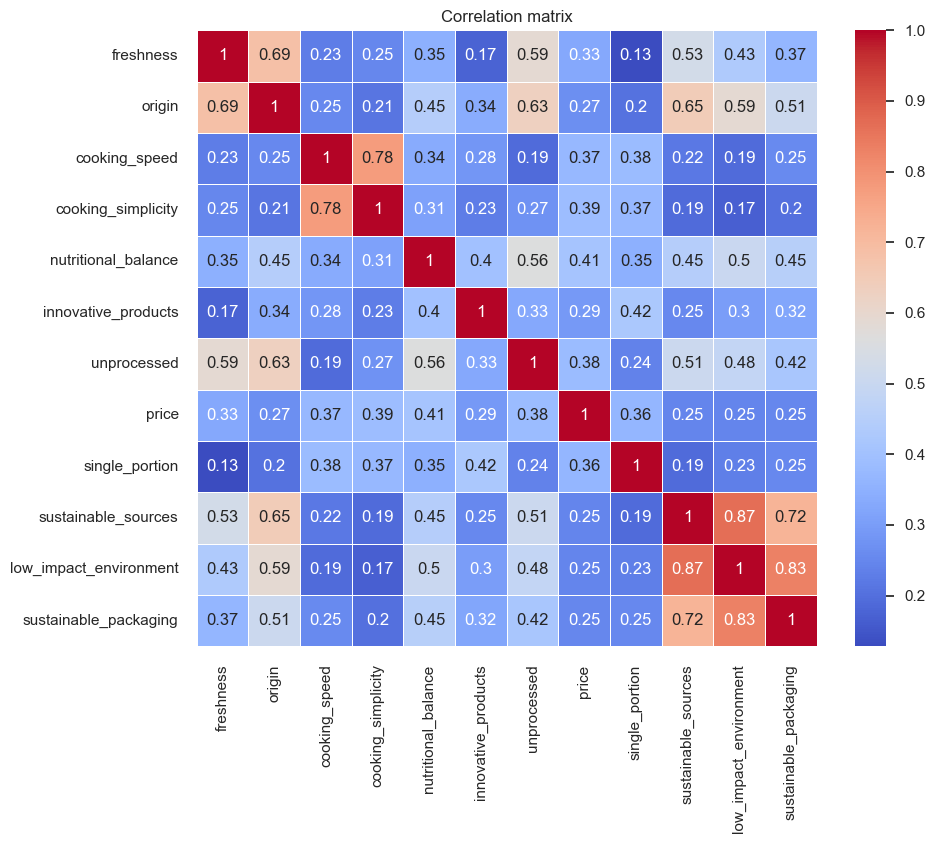

In [16]:
corr_matrix = segmentation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

-  Even though 'freshness' and 'origin' appear to be correlated (0.69), we decided to keep them both because they have significantly different implications in our decision and labour process
- 'Cooking_speed' and 'cooking_simplicity' have a high correlation (0.78) . Our respondents may have given the same meaning to the variables, therefor we computed the mean and created a new variable column named 'speed_n_simplicity'. 
- In the matrix the last three variables about sustainability are highly correlated. We first drop 'low_impact_environment' and keep 'sustainable_sources' because of their similar implications. 'sustainable_packaging' is also correlated with both variables, but we kept it due to the relevance given nowadays to this factor.  

In [17]:
segmentation_data['speed_n_simplicity'] = segmentation_data[['cooking_speed', 'cooking_simplicity']].mean(axis=1)
segmentation_data.drop(['cooking_speed', 'cooking_simplicity', 'low_impact_environment'], axis=1, inplace=True)  

In [18]:
final_segmentation_data = segmentation_data
final_segmentation_data.head()

freshness  origin  nutritional_balance  innovative_products  \
respondent_id                                                                
0                      4       3                    4                    1   
1                      5       3                    3                    2   
2                      5       4                    5                    2   
3                      5       3                    4                    1   
4                      5       5                    4                    2   

               unprocessed  price  single_portion  sustainable_sources  \
respondent_id                                                            
0                        2      5               2                    5   
1                        4      4               4                    5   
2                        3      4               4                    3   
3                        5      4               1                    3   
4                        5      5               5                    5   

               sustainable_packaging  speed_n_simplicity  
respondent_id                                             
0                                  4                 2.5  
1                                  5                 4.0  
2                                  3                 2.5  
3                                  3                 2.5  
4                                  5                 5.0

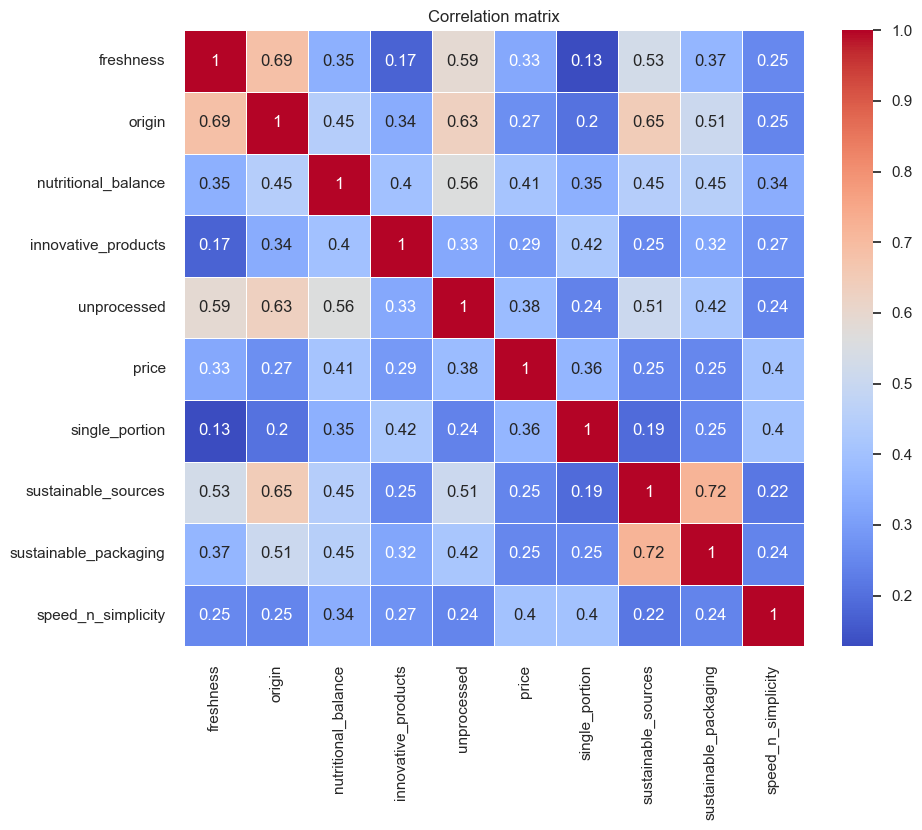

In [19]:
corr_matrix = final_segmentation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

After correlation adjustment there's a visible improvement in the heatmap. 
We can identify subgroups of variables with a medium correlation, which will be useful in the achievement of our marketing goals (e.g. 'sustainable_sources', 'origin', 'freshness', 'unprocessed').  

### **2.2. PCA**

Before proceeding with the PCA, we calculated the Kaiser-Meyer-Olkin (KMO), which is a measure of the sample's adequacy for factor analysis. 

In [20]:
kmo_all, kmo_model = calculate_kmo(final_segmentation_data)
print(f"KMO Value: {kmo_model}")

KMO Value: 0.8457551794181936


A KMO value of 0.846 indicates that the data are suitable for PCA, supporting the decision to proceed with this technique for variable reduction.

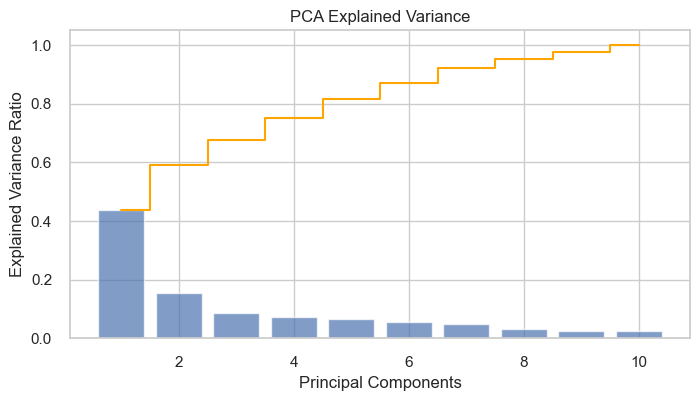

        PC1       PC2       PC3
0 -0.982740 -0.804189  0.389915
1  0.933870  0.190883  0.673907
2 -0.083061  0.783686 -0.481721
3 -1.295717 -1.576117 -1.654792
4  3.136531  0.706651 -0.431377


In [21]:
# PCA
pca_full = PCA(n_components=len(final_segmentation_data.columns))
principal_components_full = pca_full.fit_transform(final_segmentation_data)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='orange')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

# PCA with fewer components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(final_segmentation_data)
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

print(pca_df.head())

Checking the graph, explained variance is low with few components. Having at least 90% of explained variance requires:

In [22]:
components_for_90 = np.argmax(cumulative_variance >= 0.9) + 1 

print("Number of components to have 90% of variance explained:", components_for_90, "out of 10 variables")

Number of components to have 90% of variance explained: 7 out of 10 variables


For the purposes of this project, we aim at maintaining a high level of interpretability. Clustering on the original data will allow us to group individuals based on their actual characteristics, making the resulting clusters more intuitive and directly actionable. This approach is especially useful since we plan to use the results for targeted strategies or business decisions, as the clusters will be based on the real, interpretable features rather than abstract components from PCA.

Let's proceed and apply some clustering techniques on original data.

### **2.3. Clustering**

#### **2.3.1. Optimal number of clusters**.

We started with K- Means approach. At first, we computed **optimal number of clusters** with Elbow Method and Silhouette Score.

- **Elbow Method**:

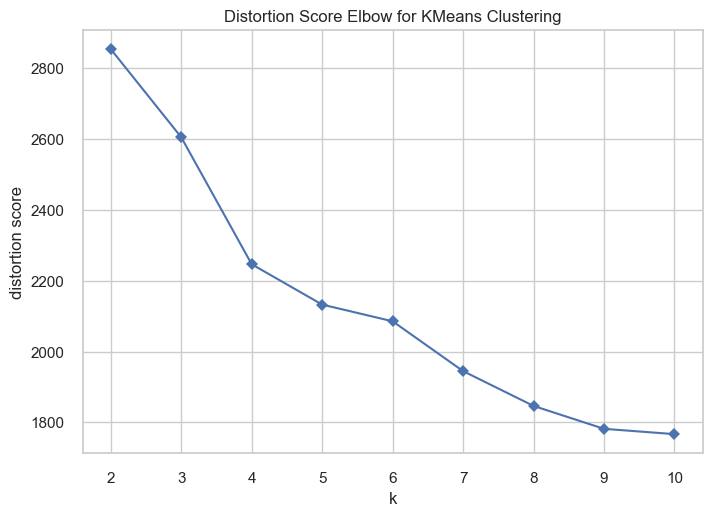

In [23]:
model = KMeans()
visualizer = KElbowVisualizer(model,timings=False, locate_elbow= False)
visualizer.fit(final_segmentation_data)
visualizer.show();

- **Silhouette Method**

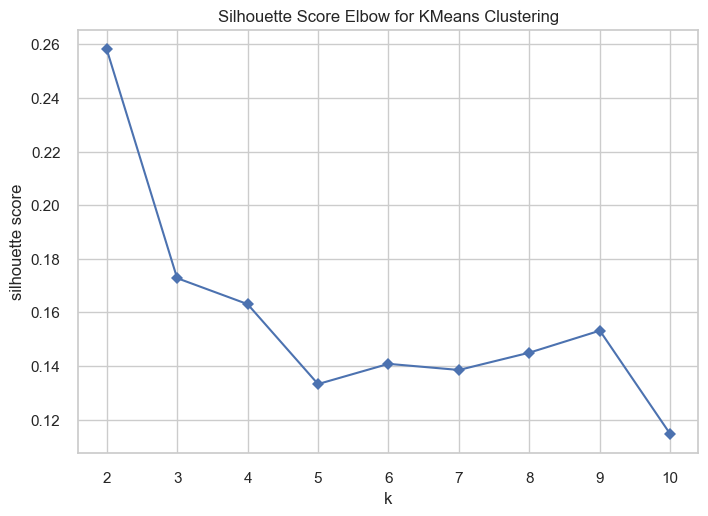

In [24]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False, locate_elbow= False)
visualizer.fit(final_segmentation_data)
visualizer.show();

When re-running the optimal number of clusters analysis, we found a lot of variability in results. This suggests a lack of stability in the clustering outcomes. The possible reasons could be:

* **Weak cluster separation**. K-Means clustering is highly sensitive to the initialization of centroids, which can result in varying cluster assignments and metrics like the Silhouette Score and Distortion Score. This variability, coupled with weak cluster separations in the data (evidenced by the drop in the Silhouette Score after k=2), suggests that the clustering structure may not be well-defined. Consequently, K-Means might struggle to produce stable and meaningful clusters.
* **Highly skewed distributions**.  Variables such as freshness, origin, nutritional_balance, and sustainable_sources are heavily skewed towards higher values (e.g., ratings of 4 or 5). This reduces variability in the data, causing clusters to overlap or making it difficult for K-Means to find distinct boundaries.


Next, we performed clustering with K=4 and 2 to understand if there are significant differences between clusters or the results above confirm our hypothesis.

#### **2.3.2. K-Means (k=2)**

In [26]:
# K-Means and assign clusters to data
kmeans2 = KMeans(n_clusters = 2, random_state=42)
kmeans2.fit(final_segmentation_data)
final_segmentation_data_2 = final_segmentation_data.copy()
final_segmentation_data_2['Cluster_KMeans'] = kmeans2.labels_ + 1

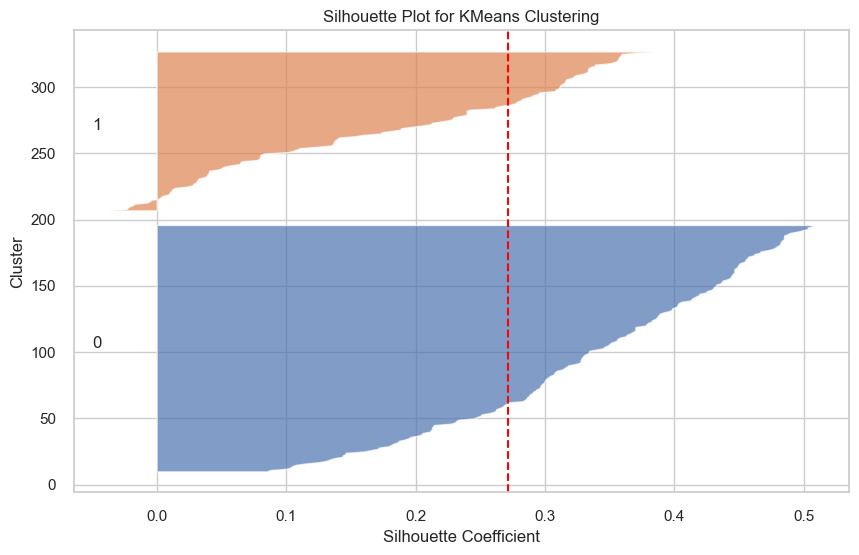

In [27]:
# Silhouette Plot
cluster_labels = kmeans2.fit_predict(final_segmentation_data_2)
silhouette_vals = silhouette_samples(final_segmentation_data_2, cluster_labels)
silhouette_avg = silhouette_score(final_segmentation_data_2, cluster_labels)
n_clusters = 2
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

In [36]:
# Compute Clusters' size
cluster_sizes = final_segmentation_data_2['Cluster_KMeans'].value_counts()
cluster_percentages = (cluster_sizes / cluster_sizes.sum()) * 100

cluster_summary = pd.DataFrame({
    'Cluster': cluster_sizes.index,
    'Count': cluster_sizes.values,
    'Percentage': cluster_percentages.values
})

cluster_summary = cluster_summary.sort_values(by='Cluster').reset_index(drop=True)
cluster_summary

Cluster  Count  Percentage
0        1    187   60.714286
1        2    121   39.285714

In [37]:
# Compute centroids' means
centroids2 = final_segmentation_data_2.groupby("Cluster_KMeans").mean().T
centroids2.insert(0,"Population",final_segmentation_data_2.mean())
centroids2.round(2)

Cluster_KMeans         Population     1     2
freshness                    4.29  4.71  3.63
origin                       3.88  4.52  2.88
nutritional_balance          3.69  4.26  2.81
innovative_products          2.60  2.97  2.02
unprocessed                  3.94  4.48  3.09
price                        3.90  4.13  3.53
single_portion               2.77  3.17  2.17
sustainable_sources          3.82  4.41  2.91
sustainable_packaging        3.65  4.27  2.68
speed_n_simplicity           3.32  3.61  2.88

In [38]:
X = final_segmentation_data_2.copy()

def style_cols(col):
    if col.name == "Population": return ["background-color: white"]*len(col)
    
    segment = X[X.Cluster_KMeans == col.name]
    rest_pop = X[X.Cluster_KMeans != col.name]
    
    colors = []
    for var_name, var_segment_mean in col.items():
        t_test, p_value = stats.ttest_ind(segment[var_name], rest_pop[var_name],equal_var=False)
        #_,p_value,_ = st.ttest_ind(segment[var_name],rest_pop[var_name],usevar="unequal")    
        if p_value < 0.05:
            color = "background-color: green" if var_segment_mean > rest_pop[var_name].mean() else "background-color: red"
        elif p_value < 0.1:
            color = "background-color: #90ee90" if var_segment_mean > rest_pop[var_name].mean() else "background-color: #f1807e"
        else: color = "background-color: white"
        colors.append(color)
    return colors

centroids2.style.apply(style_cols).format("{:.2f}")

Cluster 1 has consistently high values across all variables, while Cluster 2 shows consistently low values. This indicates a weak separation, with clusters primarily defined by overall rating levels, proving that clustering is inefficient.

#### **2.3.3. K-Means (k=4)**

In [31]:
# Compute KMeans and assign clusters to data
kmeans4 = KMeans(n_clusters = 4, random_state=42)
kmeans4.fit(final_segmentation_data)
final_segmentation_data_4 = final_segmentation_data.copy()
final_segmentation_data_4['Cluster_KMeans'] = kmeans4.labels_ +1
final_segmentation_data_4

freshness  origin  nutritional_balance  innovative_products  \
respondent_id                                                                
0                      4       3                    4                    1   
1                      5       3                    3                    2   
2                      5       4                    5                    2   
3                      5       3                    4                    1   
4                      5       5                    4                    2   
...                  ...     ...                  ...                  ...   
341                    5       5                    5                    5   
342                    4       3                    1                    2   
343                    1       1                    1                    1   
344                    4       4                    3                    2   
345                    5       4                    4                    3   

               unprocessed  price  single_portion  sustainable_sources  \
respondent_id                                                            
0                        2      5               2                    5   
1                        4      4               4                    5   
2                        3      4               4                    3   
3                        5      4               1                    3   
4                        5      5               5                    5   
...                    ...    ...             ...                  ...   
341                      4      5               4                    4   
342                      4      5               3                    4   
343                      1      5               5                    1   
344                      3      4               3                    3   
345                      4      4               1                    4   

               sustainable_packaging  speed_n_simplicity  Cluster_KMeans  
respondent_id                                                             
0                                  4                 2.5               4  
1                                  5                 4.0               4  
2                                  3                 2.5               1  
3                                  3                 2.5               4  
4                                  5                 5.0               3  
...                              ...                 ...             ...  
341                                5                 3.0               3  
342                                4                 1.0               1  
343                                1                 5.0               2  
344                                4                 3.5               1  
345                                4                 3.5               4  

[308 rows x 11 columns]

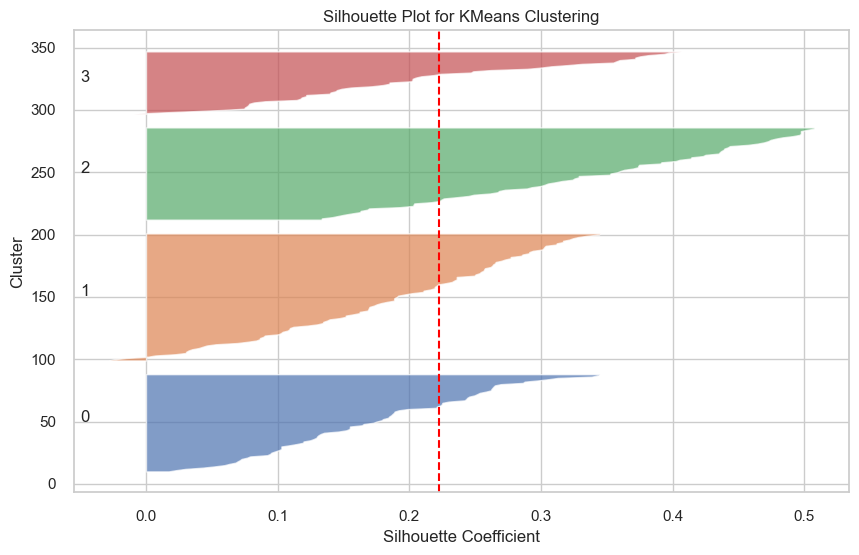

In [32]:
# Silhouette Plot
cluster_labels = kmeans4.fit_predict(final_segmentation_data_4)
silhouette_vals = silhouette_samples(final_segmentation_data_4, cluster_labels)
silhouette_avg = silhouette_score(final_segmentation_data_4, cluster_labels)
n_clusters = 4
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

In [39]:
# Compute Clusters' size
cluster_sizes = final_segmentation_data_4['Cluster_KMeans'].value_counts()
cluster_percentages = (cluster_sizes / cluster_sizes.sum()) * 100

cluster_summary = pd.DataFrame({
    'Cluster': cluster_sizes.index,
    'Count': cluster_sizes.values,
    'Percentage': cluster_percentages.values
})

cluster_summary = cluster_summary.sort_values(by='Cluster').reset_index(drop=True)
cluster_summary

Cluster  Count  Percentage
0        1     79   25.649351
1        2     51   16.558442
2        3     75   24.350649
3        4    103   33.441558

In [34]:
# Compute centroids means
centroids4 = final_segmentation_data_4.groupby("Cluster_KMeans").mean().T
centroids4.insert(0,"Population",final_segmentation_data_4.mean())
centroids4.round(2)

Cluster_KMeans         Population     1     2     3     4
freshness                    4.29  4.13  2.90  4.76  4.75
origin                       3.88  3.28  2.43  4.79  4.39
nutritional_balance          3.69  3.52  2.18  4.67  3.85
innovative_products          2.60  2.59  1.69  3.76  2.20
unprocessed                  3.94  3.73  2.45  4.63  4.32
price                        3.90  4.18  2.82  4.67  3.65
single_portion               2.77  3.06  1.80  4.08  2.08
sustainable_sources          3.82  3.16  2.51  4.59  4.42
sustainable_packaging        3.65  2.96  2.33  4.47  4.22
speed_n_simplicity           3.32  3.64  2.31  3.98  3.09

In [35]:
# Compute means table
X = final_segmentation_data_4.copy()
centroids4.style.apply(style_cols).format("{:.2f}")

Cluster 3 and Cluster 4 show consistently high values across most variables, while Cluster 1 and Cluster 2 show lower values, with Cluster 2 being the lowest overall. This pattern suggests a clear separation between high-value clusters (3 and 4) and low-value clusters (1 and 2), but the distinction within each group appears weaker.

#### **2.3.3. Hierarchical Clustering**

After performing k-means, we will also try hierarchical clustering to determine the optimal number of clusters.



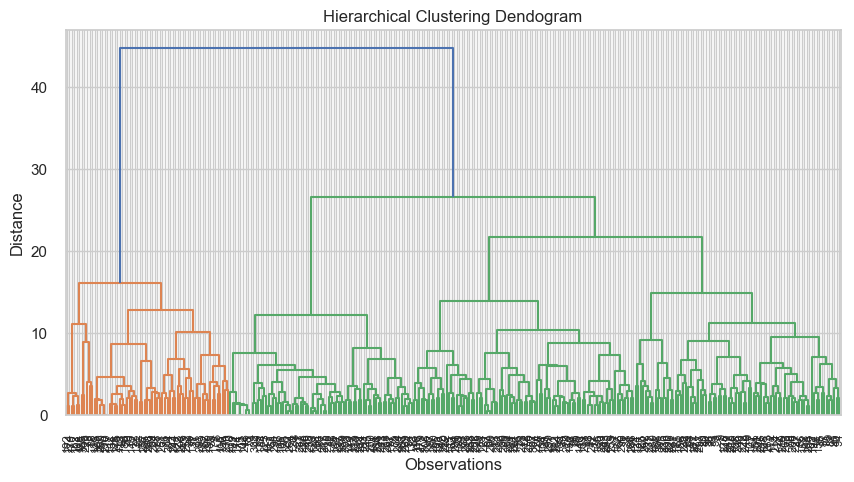

In [40]:
# Perform Hierarchical Clustering
Z = linkage(final_segmentation_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()


Based on visual inspection, 4 clusters seem to be a suitable choice for cutting the dendrogram. To ensure the selection is optimal, we will calculate the silhouette scores for further validation.

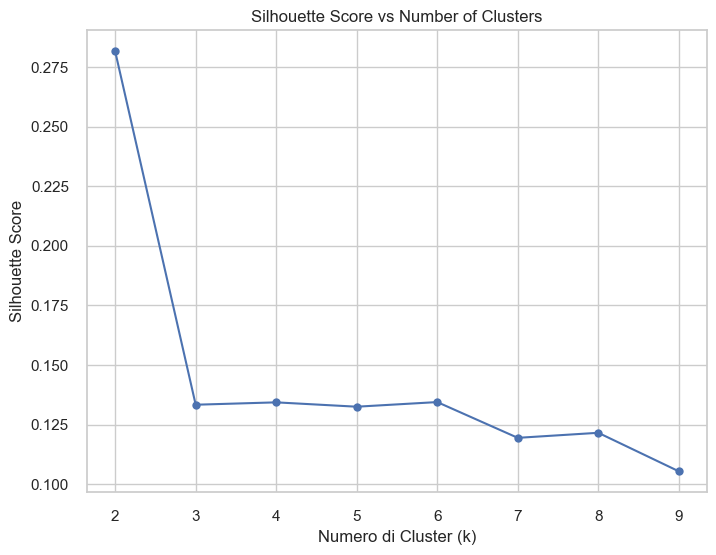

In [42]:
# Silhouette score
silhouette_scores = []
cluster_range = range(2, 10) 

for k in cluster_range:
    labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(final_segmentation_data, labels)
    silhouette_scores.append(score)
    
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


Once again, the suggested number of clusters is 2, but we believe that 2 might be too few for our data. Therefore, 4 could still be the best solution in this case as well.
We performed the same operations as we did for K-Means but we noticed that clusters' characteristics are almost the same. So, for simplicity, we will proceed with the analysis of KMeans' results.

### **2.4. Clusters Analysis**

#### **2.4.1. Analysis of sample (in general)**


For the final considerations, we proceed with analysis of characteristics of the sample in general.

The variables included are the following:
- **age**: the age range of the respondent.
- **region**: the region in Italy where the respondent lives.
- **location**: the type of area the respondent lives in, such as city centre or suburbs.
- **gender**: the gender with which the respondent identifies.
- **family_members**: the number of people in the respondent's household.
- **job**: the respondent's profession.
- **consumption_frequency**: how often the respondent consumes seafood.
- **fish_type**: the type of seafood consumed most frequently at home.
- **meal_preparation_time**: the average time spent preparing meals each day.
- **grocery_responsibility**: how often the respondent is responsible for grocery shopping.
- **grocery_place**: where the respondent most often purchases seafood.
- **WTP_fish**: the amount the respondent is willing to spend on a high-quality seafood product.

In [43]:
descriptor_data = data.iloc[:,1:16]
descriptor_data = descriptor_data.drop(descriptor_data.columns[[6,7,14]], axis=1)

# rename columns
new_names = { 'Qual è la tua età?': 'age', 
              'In che regione vivi?':'region', 
              'In che zona abiti?': 'location',
       'Con quale genere ti identifichi?' : 'gender',
       'Da quanti componenti è formato il tuo nucleo familiare?' : 'family_members',
       'Qual è la tua professione?': 'job',
        'Quanto spesso consumi prodotti ittici?': 'consumption_frequency',
       'Che tipo di prodotti ittici consumi più frequentemente in casa?': 'fish_type',
       'Quanto tempo dedichi mediamente alla preparazione dei pasti durante la giornata?' : 'meal_preparation_time',
       'Solitamente ti occupi tu della spesa nella tua famiglia?': 'grocery_responsibility',
       'Dove acquisti più spesso i tuoi prodotti ittici? (Puoi selezionare più opzioni) ': 'grocery_place',
       'Quanto saresti disposto a spendere per un prodotto ittico di alta qualità (es. burger di pesce gourmet)?': 'WTP_fish'
    
}

descriptor_data = descriptor_data.rename(columns=new_names)
descriptor_data

age     region  \
respondent_id                          
0              18-25 anni  Lombardia   
1              18-25 anni  Lombardia   
2              18-25 anni     Veneto   
3              26-35 anni  Lombardia   
4              60-70 anni  Lombardia   
...                   ...        ...   
341            60-70 anni   Campania   
342            18-25 anni  Lombardia   
343            26-35 anni      Lazio   
344            18-25 anni  Lombardia   
345            60-70 anni  Lombardia   

                                                  location gender  \
respondent_id                                                       
0                                             Centro città   Uomo   
1                                             Centro città   Uomo   
2                                             Centro città  Donna   
3                                          Periferia città  Donna   
4              Esterno (es. campagna/costiera/montagna...)  Donna   
...                                                    ...    ...   
341                                        Periferia città  Donna   
342                                           Centro città   Uomo   
343                                           Centro città   Uomo   
344                                           Centro città  Donna   
345            Esterno (es. campagna/costiera/montagna...)   Uomo   

              family_members         job    consumption_frequency  \
respondent_id                                                       
0                         4+    Studente    Una volta a settimana   
1                        2-3  Lavoratore    Una volta a settimana   
2                          1    Studente    Una volta a settimana   
3                        2-3  Lavoratore  Una o due volte al mese   
4                          1  Lavoratore  Una o due volte al mese   
...                      ...         ...                      ...   
341                      2-3  Lavoratore  Una o due volte al mese   
342                       4+    Studente    Una volta a settimana   
343                        1  Lavoratore  Una o due volte al mese   
344                       4+    Studente    Una volta a settimana   
345                      2-3  Lavoratore  Una o due volte al mese   

                      fish_type meal_preparation_time grocery_responsibility  \
respondent_id                                                                  
0               Pesce surgelato          15-30 minuti          Raramente/Mai   
1               Pesce surgelato          15-30 minuti                A volte   
2                  Pesce fresco          30-60 minuti    Sempre/Quasi sempre   
3                  Pesce fresco          30-60 minuti    Sempre/Quasi sempre   
4               Pesce surgelato          15-30 minuti    Sempre/Quasi sempre   
...                         ...                   ...                    ...   
341             Pesce surgelato          30-60 minuti                A volte   
342                Pesce fresco          30-60 minuti    Sempre/Quasi sempre   
343            Pesce in scatola     Meno di 15 minuti    Sempre/Quasi sempre   
344             Pesce surgelato          15-30 minuti    Sempre/Quasi sempre   
345             Pesce surgelato          30-60 minuti    Sempre/Quasi sempre   

                                                   grocery_place  \
respondent_id                                                      
0                                                   Supermercato   
1              Supermercato;Negozi specializzati (es. pescherie)   
2                                    Supermercato;Mercati locali   
3                                                   Supermercato   
4                                                   Supermercato   
...                                                          ...   
341                                                 Supermercato   
342                                                 

Let's first examine the distribution of these variables across the entire dataset. This will allow us to analyze the sample and better understand the underlying patterns in the data.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\2106122132.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processed_df, x=column, palette='Set2', ax=axes[i])
C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\2106122132.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processed_df, x=column, palette='Set2', ax=axes[i])
C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\2106122132.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processed_df, x=column, palette='Set2', ax=axes[i])
C:\Users\Pancione\A

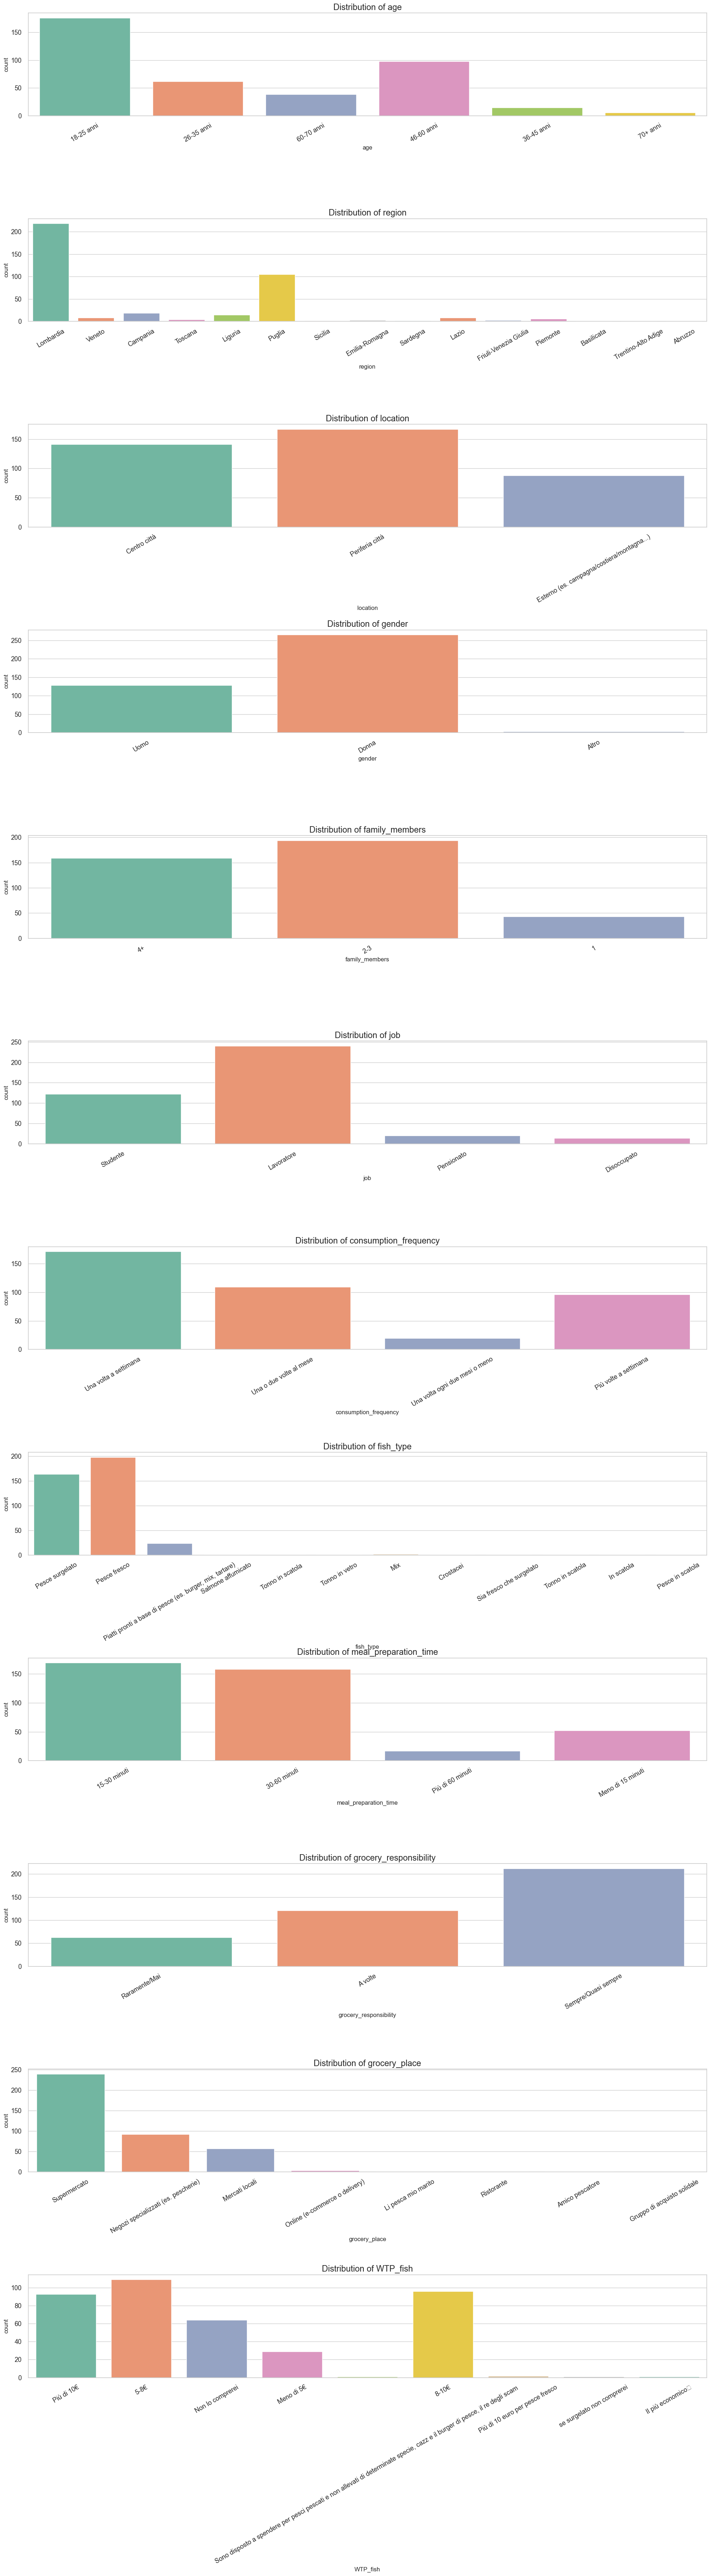

In [44]:
# Plot bar chart for each variable
sns.set(style="whitegrid")

def plot_bar_grid(df, columns, cols=1, explode_columns=None, delimiter=','):
    if explode_columns is None:
        explode_columns = []

    processed_df = df.copy()
    for column in explode_columns:
        if column in processed_df.columns:
            processed_df = processed_df.dropna(subset=[column])
            processed_df[column] = processed_df[column].str.split(delimiter)
            processed_df = processed_df.explode(column)

    total_plots = len(columns)
    rows = (total_plots + cols - 1) // cols 

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6))  
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if column in processed_df.columns:
            sns.countplot(data=processed_df, x=column, palette='Set2', ax=axes[i])
            axes[i].set_title(f'Distribution of {column}', fontsize=17)
            axes[i].tick_params(axis='x', rotation=30, labelsize=13) 
            axes[i].tick_params(axis='y', labelsize=13) 

    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(hspace=1) 
    plt.show()


columns_to_plot = descriptor_data.columns
plot_bar_grid(
    descriptor_data,
    columns_to_plot,
    cols=1, 
    explode_columns=['grocery_place'], 
    delimiter=';' 
)

**Demographic Characteristics:**
- **age:** The majority of respondents are in the 18-25 years range, making up nearly half of the sample. The second-largest group is the 46-60 years range, followed by 26-35 years. The older age groups (60-70 years and 70+ years) represent a smaller proportion of the sample. This suggests that the sample may be skewed towards younger individuals.
- **region:** The distribution suggests a concentration of respondents in certain regions, particularly in Lombardia and Puglia. Several other regions like Campania, Liguria, and others represent a smaller proportion, and some regions are underrepresented with only a handful of respondents. This may impact the generalizability of the findings if the sample does not reflect the national distribution evenly.
- **location:** This suggests a relatively balanced distribution between urban (city center and suburbs) and more rural areas, although the suburban areas slightly dominate the sample. This could indicate that the survey captures a mix of urban and non-urban experiences but leans slightly towards suburban living.
- **gender:** This distribution indicates a strong skew towards female respondents.
- **family_members:** This suggests that most respondents come from medium to large households, with a relatively smaller group of single-person households.
- **job:** The survey primarily captures perspectives from the working and student populations, with a smaller representation from retirees and the unemployed. The distribution indicates a fairly typical demographic spread of working-age individuals and students, though the sample is more heavily skewed towards those in employment.


**Habits:**
- **consumption_frequency:** Seafood is a relatively regular part of many respondents' diets, with a significant number of people consuming it weekly or more frequently. However, there is still a notable portion of the sample that consumes seafood infrequently.
- **fish_type:** This distribution indicates a strong preference for traditional forms of seafood, with fresh and frozen options being the most commonly consumed types.
- **meal_preparation:** Only a small portion spends more than an hour preparing meals, while the majority spends an average time of around 30 minutes.
- **grocery_responsibility:** More than half of the people take care of grocery shopping, and only a small portion never do, indicating that the data collected comes from individuals who actually purchase fish, meaning potential customers.
- **grocery_place:** The majority buy from supermarkets, while only a smaller portion purchase from specialized shops or local markets, making them not potential customers since our company sells frozen fish.
- **WTP_fish:** There is a fairly even distribution across all the proposed ranges.

While obtainig a sample through **convenience sampling** allowed us to get a rapid collection of useful data, it presents significant limitations in terms of the representativeness of the general population.
First of all we can see the overrepresentation of certain categories, indeed pecific groups, such as individuals aged 18–25 and residents of Lombardia and Puglia, are overrepresented compared to other age groups and regions and this may distort the results and limit the generalizability of the conclusions.
In addiction to this, there is a slight gender imbalance, with the predominance of female respondents (over 60%) that may introduce bias, as men and women can have different preferences regarding seafood products.

We can conclude that we do not have a perfectly representative sample of the entire population, but we do have votes for some categories, and if the limitations are properly taken into account, we could still conduct a good analysis.

---

#### **2.4.2. Analysis of clusters**

After analyzing demographic information, we now examine the specific characteristics of each cluster to identify patterns and differences.

In [45]:
descriptor_data['Cluster_K2'] = final_segmentation_data_2['Cluster_KMeans']
descriptor_data['Cluster_K4'] = final_segmentation_data_4['Cluster_KMeans']

To gain some insights, we created **pie charts of the distribution of variables across each cluster**.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\3132827631.py:20: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\3132827631.py:20: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


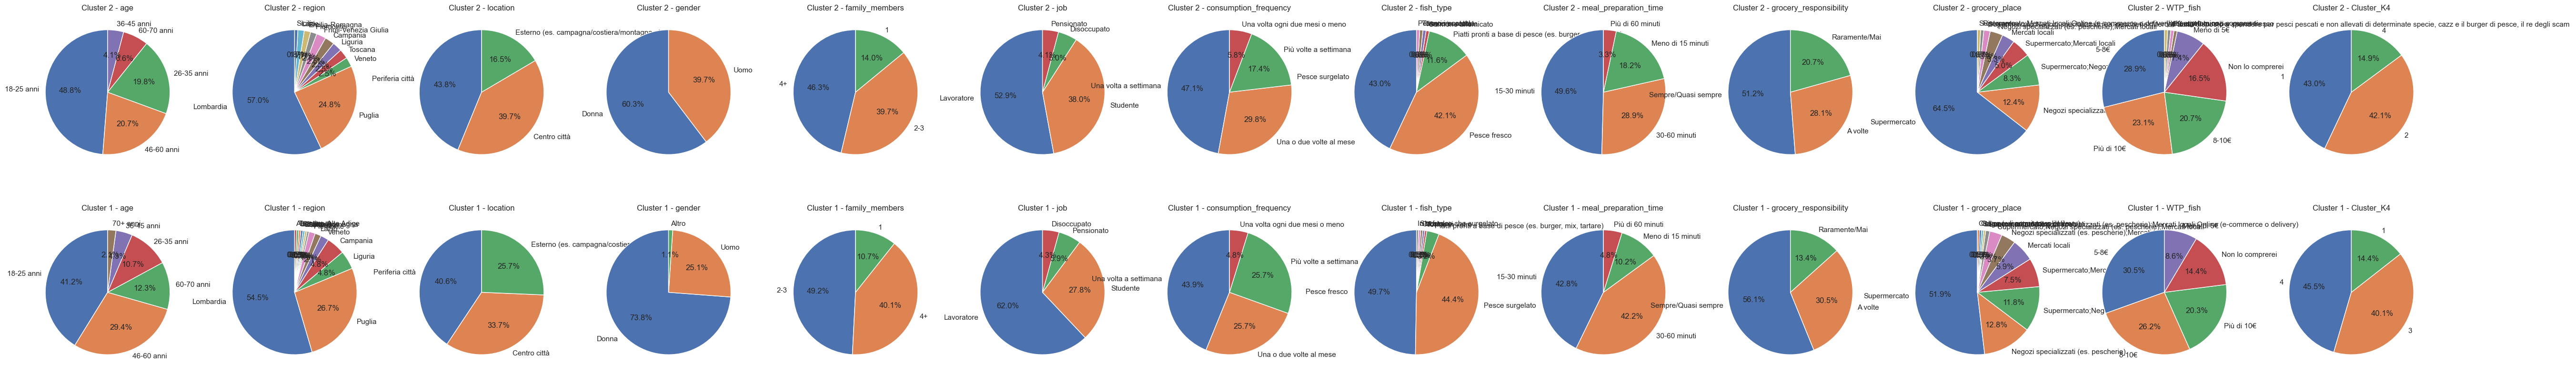

In [46]:
clusters = descriptor_data['Cluster_K2'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster_K2', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters)) 

if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster_K2'] == cluster]
    for j, var in enumerate(variables):
        counts = cluster_data[var].value_counts()
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()

**Analysis with K=2**:
- **Cluster 1:** This cluster highly values freshness, origin, and unprocessed products. They also place significant importance on sustainable packaging and sources, suggesting a strong environmental awareness. Less importance is placed on innovative products, single portions, and the speed and simplicity of product preparation. This indicates a preference for traditional products that do not necessarily require quick preparation or come pre-packaged in single servings. 
Predominantly female under 35 years old, a large portion (42,2%) spend 30-60 minutes on meal preparation. Mostly, they buy fish at supermarkets, but there are also modest percentages who purchase from fish shops and local markets.
- **Cluster 2:** Low importance is placed on attributes like freshness, origin and sustainable aspects. This cluster seems to prioritize convenience and price over other factors.
More gender-balanced, mainly students, spend less time preparing meals, consume fish less frequently, mainly buy fish products at supermarkets.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\977047102.py:20: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\977047102.py:20: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


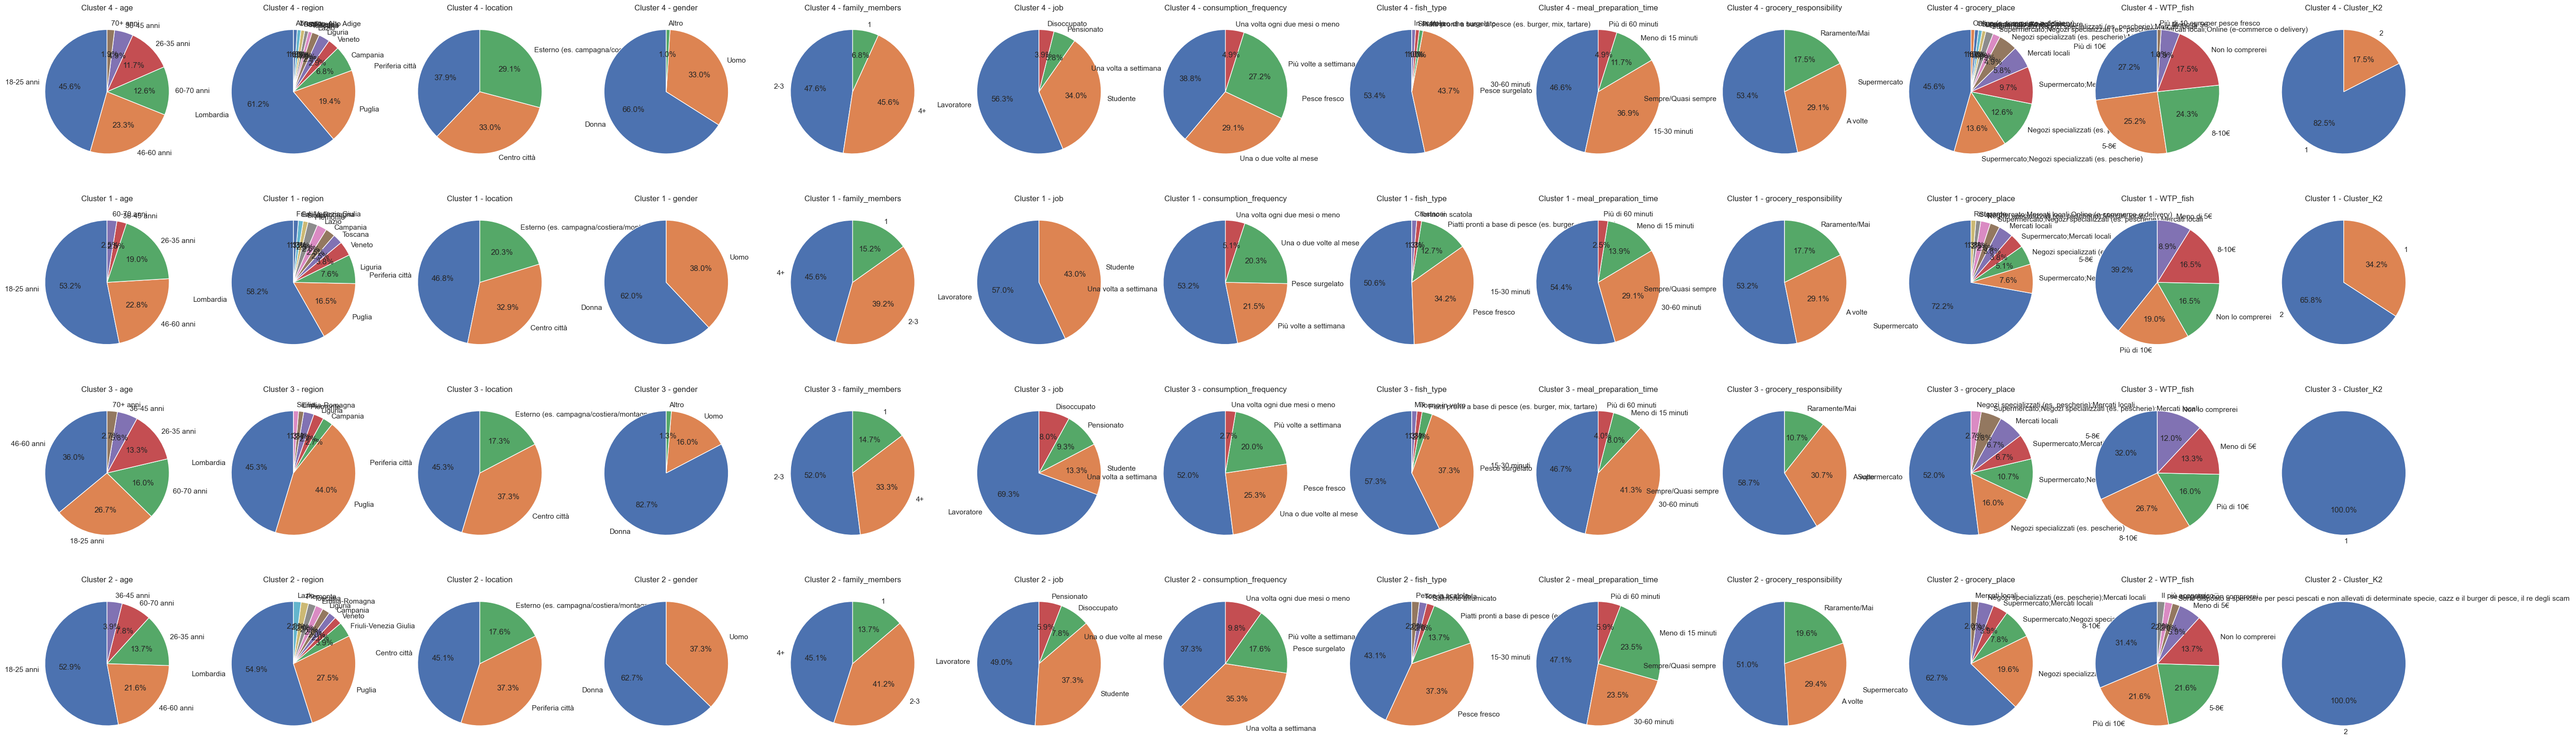

In [47]:
clusters = descriptor_data['Cluster_K4'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster_K4', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters))

if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster_K4'] == cluster]
    for j, var in enumerate(variables): 
        counts = cluster_data[var].value_counts()
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()

**Analysis with K=4**
- **Cluster 1:**  
  This group highly values **freshness**, **price**, and **unprocessed products**, but shows less interest in **innovative products** and **sustainable packaging**. Primarily composed of younger individuals aged **18-35**, with a balanced mix of workers and students. They mainly shop at supermarkets and spend little time on meal preparation, often opting for ready-made or frozen meals. Despite their interest in freshness, their budget constraints and lifestyle drive them to prioritize affordability over quality, highlighting a potential aspiration for fresh fish that is not always met in practice.

- **Cluster 2:**  
  This group exhibits the **lowest interest across all attributes**, showing little importance for **freshness**, **origin**, or **sustainability**, and consuming the least amount of fish. The majority are younger individuals, mainly under **35 years old**, who spend minimal time cooking and tend to prefer ready-made products. This group represents the least engaged segment with minimal attachment to fish consumption and its attributes.

- **Cluster 3:**  
  This is the **most demanding group**, placing high importance on **freshness**, **origin**, and **sustainability** across all variables. A significant portion of this cluster is women (**82.7%**), with a diverse age distribution but the highest representation of people aged **40-60 years**. Many come from **Puglia**, a region likely offering greater access to fresh fish. This group spends the most time cooking and exhibits strong preferences for high-quality and traditional fish products, reflecting their commitment to quality meals.

- **Cluster 4:**  
  This group values **freshness**, **origin**, **unprocessed products**, and **sustainability**, but shows less interest in **innovative products**, **single servings**, and the **speed and simplicity of preparation**. The cluster has a diverse age distribution and is predominantly composed of workers. A large portion spends **30-60 minutes** on meal preparation (**46.6%**) and doesn't show a clear preference for buying places. They represent a more traditional segment that prioritizes quality over convenience.


A more detailed analysis of the clusters reveals some inconsistencies, possibly due to respondents’ biases and bad answering. For example, the first cluster places great importance on freshness but is also very sensitive to price, which is somewhat contradictory. In fact, when examining their willingness to pay for fish, only 19% would be willing to spend more than 10 euros for a quality product, and about 70% purchase at supermarkets. This suggests that they would not be inclined to shop at markets or specialty stores for higher quality products. Similarly, Cluster 3 places high importance on almost all variables (freshness, origin, nutritional balance, sustainability), but also on price, which is also contradictory because purchasing a fish product that combines all these features would necessarily be quite expensive. Again, the pie chart shows that most of them shop at supermarkets, and only 16% would be willing to spend more than 10 euros.

**Comparison Between \(k=2\) and \(k=4\):**
- When using \(k=2\), the clusters separate into two broad groups: one with **high attribute values** and another with **low attribute values**. Pie charts show that clusters 2 and 3 from \(k=4\) completely correspond to a specific cluster in \(k=2\), while clusters 1 and 4 don't have a clear correspondence. 
- However, \(k=4\) provides a more nuanced understanding of specific interests, while \(k=2\) overly generalizes the segments.
- We decided to proceed with \(k=4\) because it offers more granular insights into consumer preferences, which are valuable for identifying specific target audiences. Also, silhouette plots confirm our intentions.

Given that our company specializes in frozen products, we could approach each cluster with tailored strategies:

- **Cluster 3:** This group shows a strong preference for fresh products, which makes them less aligned with our core offerings.

- **Clusters 1 and 2:** These clusters are more inclined toward convenience-oriented products. They are likely to be interested in ready-made, easy-to-cook frozen meals, which align well with our product offerings. Emphasizing the speed and simplicity of preparation will be key to targeting these segments effectively.

- **Cluster 4:** While this cluster prioritizes traditional products and spends more time cooking, they do not completely exclude frozen products. By focusing on high-quality frozen options that align with traditional cooking styles (e.g., unprocessed or minimally processed products), we can position our offerings as complementary to their preferences.



---


### **2.5. Cluster Analysis with PCA**


Given the limitations and challenges encountered in the course of our work, we believe it is worth considering an alternative approach. Specifically, we intend to explore incorporating the Principal Components (PCs) that were previously excluded from our analysis. Initially, our primary focus was on achieving greater interpretability, which led us to set aside certain components that might have introduced complexity. However, upon reflecting on the outcomes and the potential for improvement, we now aim to revisit this decision. By including these additional components, we hope to enhance the quality, depth, and overall effectiveness of our analysis, striving to strike a balance between interpretability and a more comprehensive understanding of the data.

In [48]:
segmentation_data = final_segmentation_data
segmentation_data = segmentation_data.iloc[:-1]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(segmentation_data)

#### **2.5.1. Principal Components**

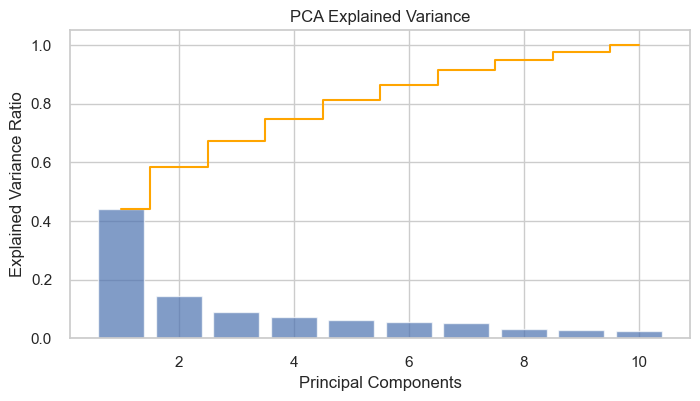

Explained variance per component: [0.4411048  0.14429536 0.08894599 0.07320545 0.06323211]
Cumulative explained variance: [0.4411048  0.58540016 0.67434615 0.74755161 0.81078371]


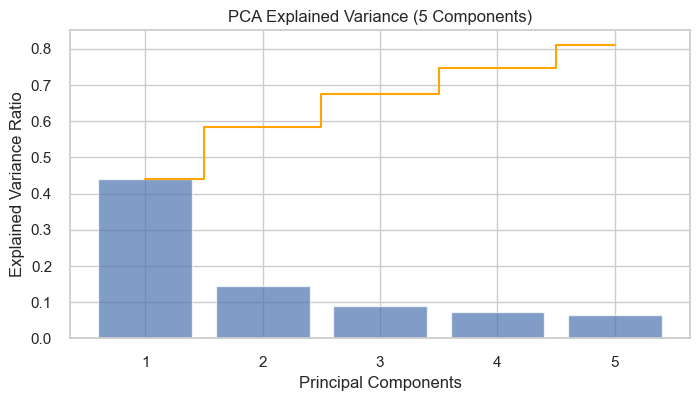

In [49]:
# PCA
pca_full = PCA(n_components=len(segmentation_data.columns))
principal_components_full = pca_full.fit_transform(data_scaled)
explained_variance = pca_full.explained_variance_ratio_
explained_variance_percent = explained_variance * 100 
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', color='orange')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()


# PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the 5 principal components
pca_df = pd.DataFrame(principal_components, 
                      columns=['PC1','PC2','PC3','PC4','PC5'])

# Explained variance ratios for the 5 PCs
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained variance per component:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)

# Plot explained variance
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, 
         where='mid', color='orange')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance (5 Components)')
plt.show()

In [50]:
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=segmentation_data.columns
)

print("PCA Loadings (Coefficients):")
print(loadings)

for pc in loadings.columns:
    # Sort by absolute value to find highest magnitude (positive or negative)
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    top_features = sorted_loadings.head(5)  # pick top 5 by absolute value
    print(f"\nTop loadings for {pc}:")
    print(top_features)

PCA Loadings (Coefficients):
                            PC1       PC2       PC3       PC4       PC5
freshness              0.332062 -0.304853 -0.418225 -0.076856 -0.334423
origin                 0.376508 -0.293115 -0.059336 -0.126082 -0.320104
nutritional_balance    0.345846  0.120230  0.068221 -0.168421  0.518769
innovative_products    0.258600  0.328503  0.427312 -0.511846 -0.255405
unprocessed            0.367075 -0.147885 -0.208741 -0.364036  0.117542
price                  0.269032  0.332824 -0.439440  0.031256  0.475952
single_portion         0.231464  0.522285  0.183256  0.031862 -0.258934
sustainable_sources    0.360920 -0.313731  0.251763  0.320759  0.051471
sustainable_packaging  0.336732 -0.165434  0.467172  0.413973  0.194015
speed_n_simplicity     0.239046  0.409342 -0.287090  0.528272 -0.321959

Top loadings for PC1:
origin                   0.376508
unprocessed              0.367075
sustainable_sources      0.360920
nutritional_balance      0.345846
sustainable_packagin

- **PC1: Quality** = Scoring high values in this component means that the consumers prefer eco-friendly practices, minimally processed products and pay attention to the origin of the ingredients.
- **PC2: Cooking Convenience** = Scoring high values in this component means that the consumers prefer quick and simple cooking options, prioritizing easy-to-prepare products or single-serving portions.
- **PC3: Sustainability** = Scoring high values in this component means that the consumer balance affordability, freshness, and innovation, with a moderate focus on sustainable packaging.
- **PC4: Convenience & Innovation** = Scoring high values in this component means that the consumers prefer products that are easy to cook, environmentally responsible and innovative, blending practicality with values.   
- **PC5: Balanced nutrition & Affordability** =  Scoring high values in this component means that the consumers prefer cost covenient products, nutritional balance with moderate importance given to simplicity and product origin.

#### **2.5.2. Optimal number of clusters**

Find optimal number of custers through **Elbow Method**

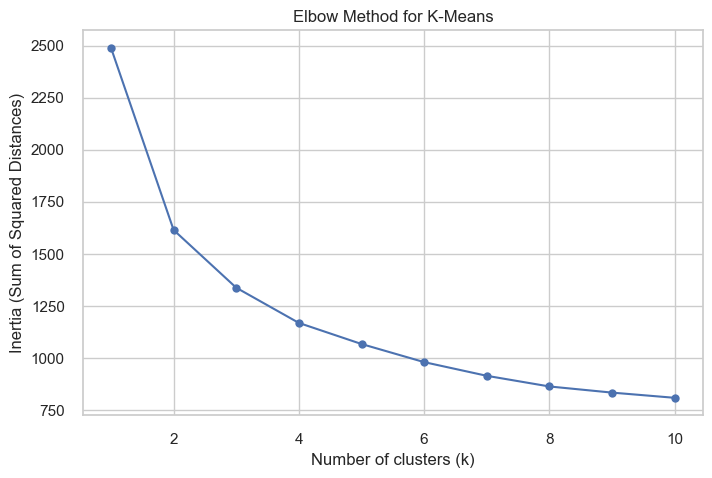

In [51]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

#### **2.5.3. Clusters Analysis (k=4)**

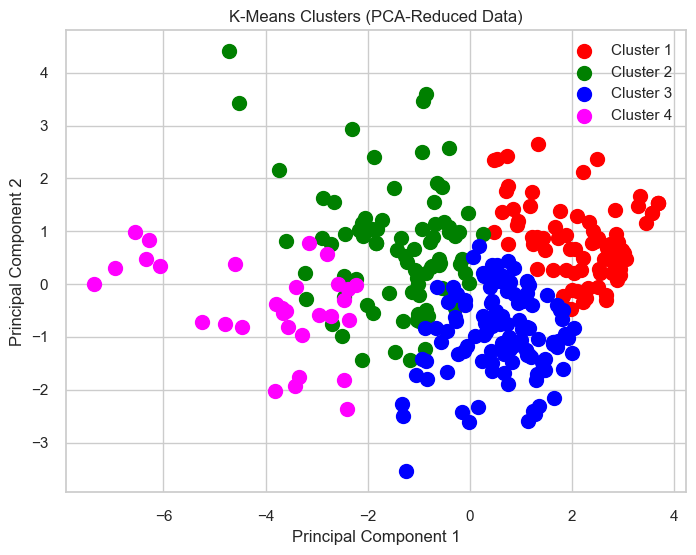

In [54]:
if 'Cluster' in pca_df.columns:
    pca_df.drop('Cluster', axis=1, inplace=True)
    
# Fit K-Means
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df[['PC1','PC2', 'PC3', 'PC4', 'PC5']]) 

pca_df['Cluster'] = kmeans.labels_ + 1

# Plot each cluster with a different color
colors = ['red', 'green', 'blue', 'magenta', 'orange']
plt.figure(figsize=(8,6))

for cluster_label in range(1, k + 1):
    subset = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        s=100, 
        c=colors[cluster_label - 1], 
        label=f'Cluster {cluster_label}'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (PCA-Reduced Data)')
plt.legend()
plt.show()

In [55]:
score = silhouette_score(pca_df[['PC1','PC2','PC3','PC4','PC5']], pca_df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.21444538653106998


In [56]:
segmentation_data['Cluster'] = pca_df['Cluster']

# Compute mean of original variables by cluster
cluster_means = segmentation_data.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         freshness    origin  nutritional_balance  innovative_products  \
Cluster                                                                  
1.0       4.388889  4.055556             3.722222             2.694444   
2.0       4.281690  3.732394             3.605634             2.535211   
3.0       4.320000  3.890000             3.740000             2.750000   
4.0       4.071429  3.642857             3.571429             2.214286   

         unprocessed     price  single_portion  sustainable_sources  \
Cluster                                                               
1.0         4.027778  3.888889        2.750000             3.986111   
2.0         3.676056  3.873239        2.845070             3.676056   
3.0         4.010000  3.970000        2.760000             3.940000   
4.0         4.000000  3.678571        2.464286             3.642857   

         sustainable_packaging  speed_n_simplicity  
Cluster                                             
1.0    

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\951485215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['Cluster'] = pca_df['Cluster']


- **Cluster 1: Sustainability-Focused Consumers**. Prioritize eco-friendliness, freshness, and minimally processed products, with moderate attention to price and convenience.

- **Cluster 2: Balanced and Practical Buyers**. Value a mix of sustainability, freshness, and practicality, with a focus on portion control and moderate eco-friendliness.

- **Cluster 3: Freshness-Oriented Consumers**. Emphasize fresh, high-quality, and natural products, with secondary attention to sustainability and less focus on convenience.

- **Cluster 4: Price-Sensitive Traditional Consumers**. Cost-conscious consumers focused on affordable, fresh, and minimally processed options, with little interest in innovation or sustainability.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\2401202215.py:23: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\2401202215.py:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


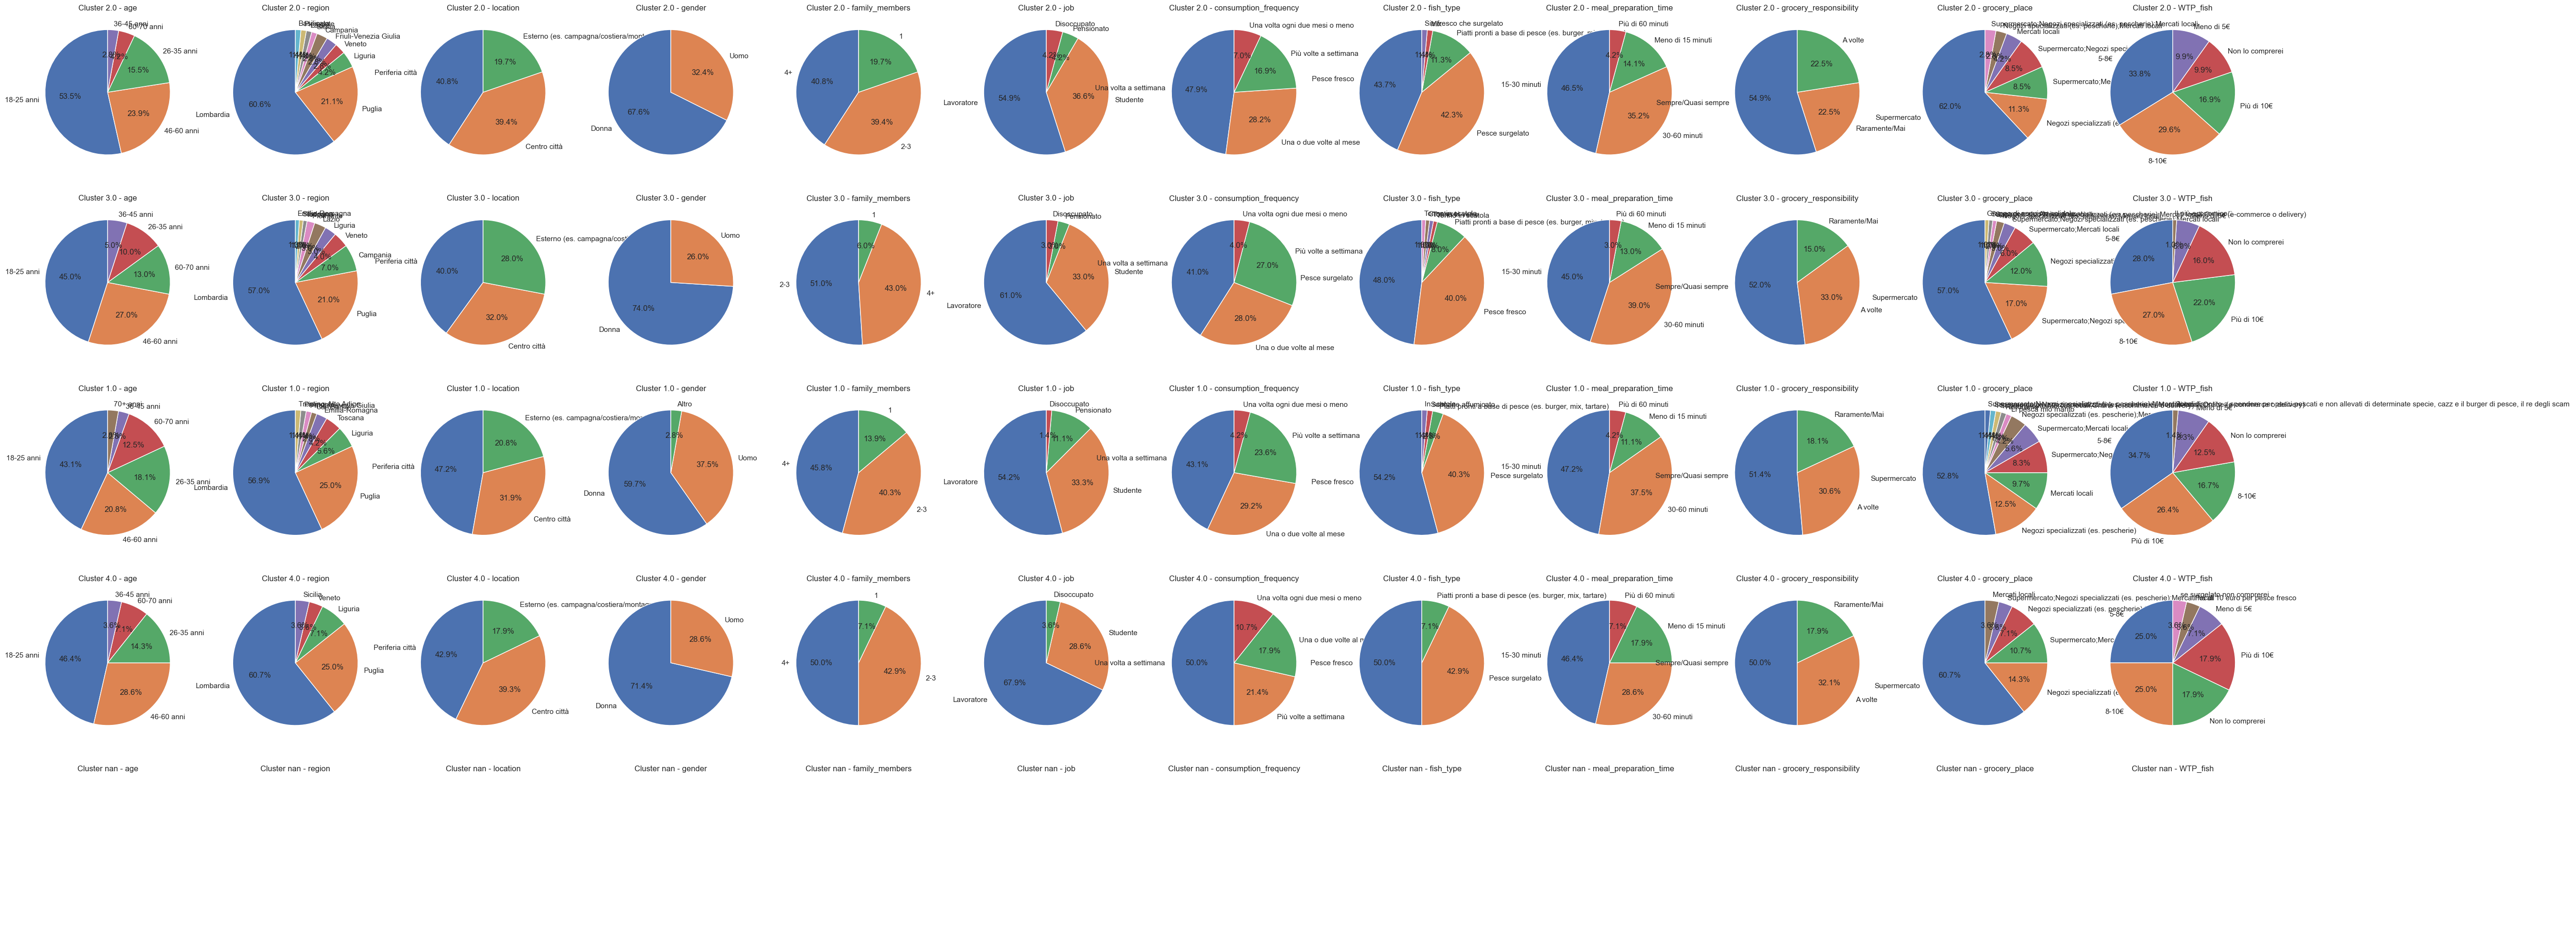

In [57]:
descriptor_data['Cluster'] = segmentation_data['Cluster']

clusters = descriptor_data['Cluster'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster', 'Cluster_K2', 'Cluster_K4', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters))


if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster'] == cluster]
    for j, var in enumerate(variables):
        counts = cluster_data[var].value_counts()
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()

#### **2.5.4. Clusters Analysis (k=2)**

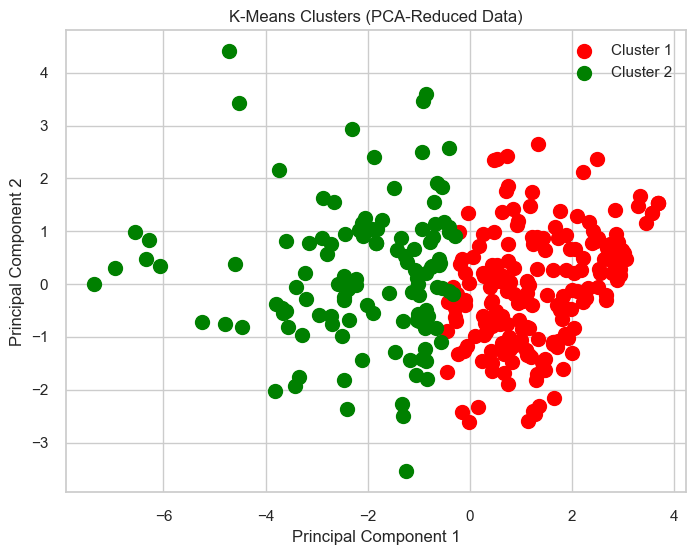

In [58]:
if 'Cluster' in pca_df.columns:
    pca_df.drop('Cluster', axis=1, inplace=True)
    
# Fit K-Means
k=2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df[['PC1','PC2', 'PC3', 'PC4', 'PC5']])

pca_df['Cluster'] = kmeans.labels_ + 1

# Plot each cluster with a different color
colors = ['red', 'green']
plt.figure(figsize=(8,6))

for cluster_label in range(1, k + 1):
    subset = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        s=100, 
        c=colors[cluster_label - 1], 
        label=f'Cluster {cluster_label}'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (PCA-Reduced Data)')
plt.legend()
plt.show()

In [59]:
score = silhouette_score(pca_df[['PC1','PC2','PC3','PC4','PC5']], pca_df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.3153688738116195


In [60]:
segmentation_data['Cluster'] = pca_df['Cluster']

# Compute mean of original variables by cluster
cluster_means = segmentation_data.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         freshness    origin  nutritional_balance  innovative_products  \
Cluster                                                                  
1.0       4.366864  4.011834             3.786982             2.751479   
2.0       4.196078  3.627451             3.509804             2.411765   

         unprocessed     price  single_portion  sustainable_sources  \
Cluster                                                               
1.0         4.041420  3.946746        2.763314             4.000000   
2.0         3.735294  3.803922        2.725490             3.607843   

         sustainable_packaging  speed_n_simplicity  
Cluster                                             
1.0                   3.840237            3.346154  
2.0                   3.343137            3.279412  


C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\951485215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['Cluster'] = pca_df['Cluster']


- **Cluster 1: Sustainability and Quality Enthusiasts**.
Consumers prioritize eco-friendly, fresh, and minimally processed products, with a strong focus on sustainability and quality.
- **Cluster 2: Practical and Price-Oriented Consumers**.
Cost-conscious shoppers value freshness and affordability, with moderate attention to sustainability and little interest in innovation.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\3614605672.py:22: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Temp\ipykernel_10928\3614605672.py:22: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


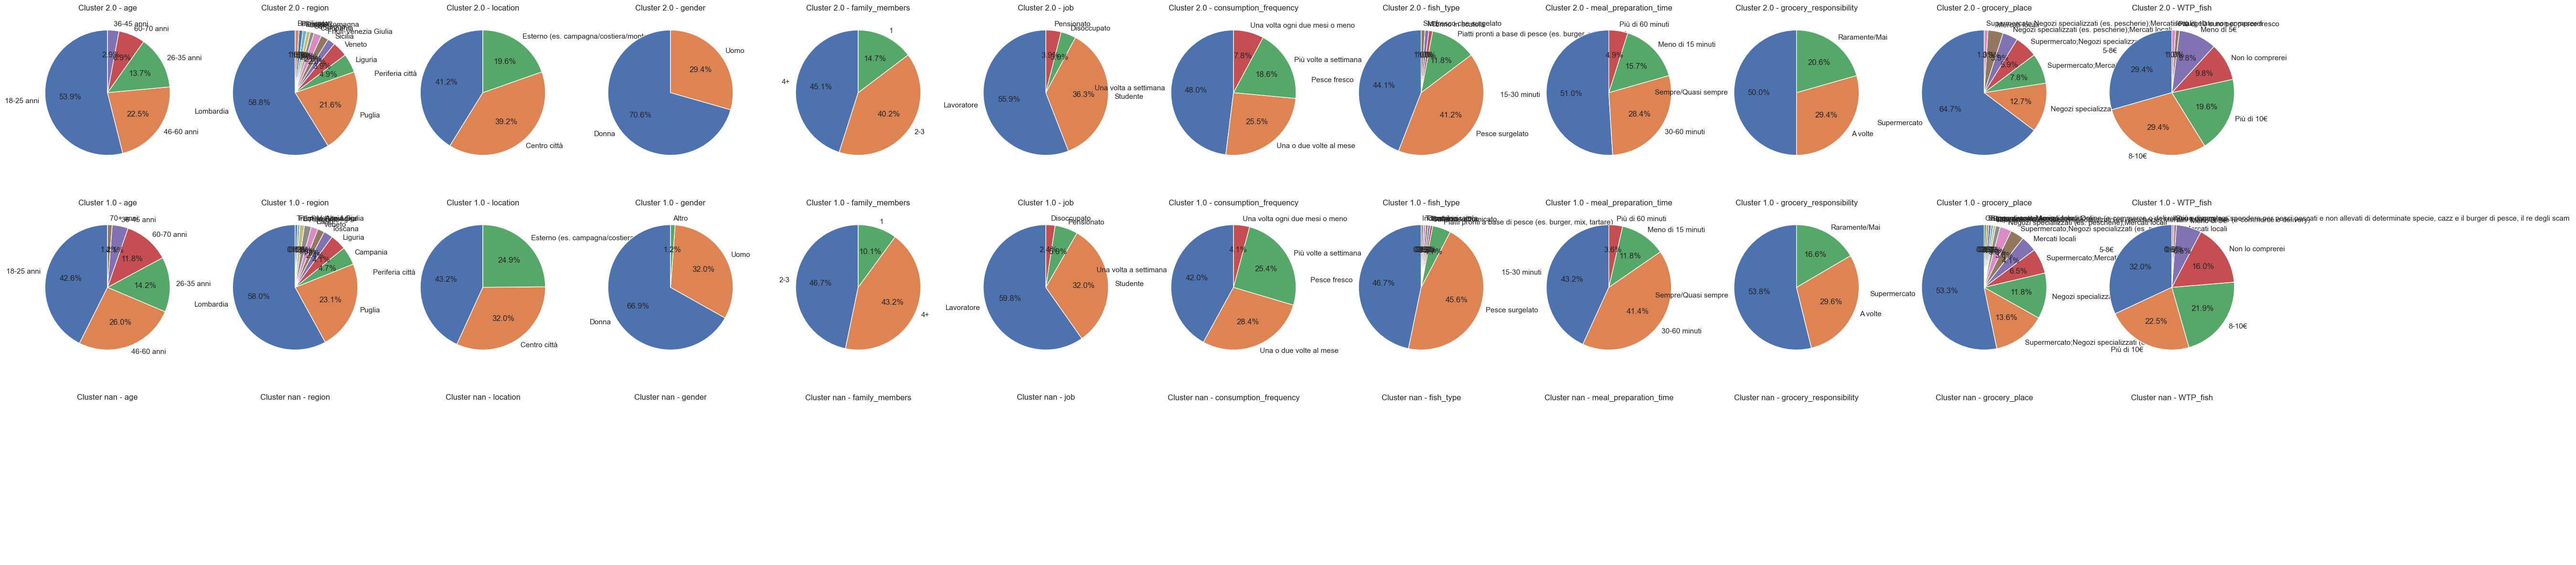

In [61]:
descriptor_data['Cluster'] = segmentation_data['Cluster']

clusters = descriptor_data['Cluster'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster', 'Cluster_K2', 'Cluster_K4', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters))

if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster'] == cluster]
    for j, var in enumerate(variables):
        counts = cluster_data[var].value_counts()
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()

### **2.6. Conclusions and Limitations**

**Bias and Reliability Issues:**
1. **Freshness Attribute:**
   - The question about freshness appears to focus more on a general interest rather than the specific context of purchase. This could lead to inflated ratings, and we suggest reformulating the question for future surveys to better capture actionable insights.

2. **Sustainability Attribute:**
   - The responses on sustainability might be biased due to its status as a "sensitive" or "hot topic" for customers. Some respondents may have felt compelled to give high ratings, even if their behavior does not align with these preferences. This is evident from the highly skewed distribution of ratings, with a majority giving top scores (5). As a result, clusters may not be entirely reliable or reflective of true preferences.

3. **Correlated Attributes:**
   - Certain attributes, such as **speed** and **simplicity of preparation**, as well as different dimensions of sustainability (e.g., **packaging**, **sustainable fishing**, and **low-impact environment**), are highly correlated. Reformulating these attributes or combining them into broader categories could improve the clarity of future analyses.

4. **Price attribute:**
    - The **'price'** attribute showed contradictions: while price sensitivity was highlighted as important, many respondents also indicated a willingness to spend more for higher quality. Reformulating this as **'willingness to pay more for quality'** could provide more actionable insights.

5. **Innovative products attribute**
    - The attribute **'innovative_products'** stood out due to its relatively well-distributed responses. This makes it a valuable metric for understanding how to create new products and cater to specific consumer segments.


**Limitations of the Clustering Analysis:**
1. **Inefficiency in Clustering:**
   - The clustering process showed weak separation between certain groups, indicating that the clusters are not fully robust or reliable. This may stem from biases in the data, the choice of attributes, or inherent overlaps in consumer preferences.
2. **Limited Reliability for Strategy:**
   - Given the inefficiency and potential biases, the clustering results cannot be fully relied upon for a completely data-driven strategy. While the analysis provides a general idea of segment characteristics, decisions should not be based solely on these clusters. Instead, we recommend focusing on the **most relevant cluster for specific goals** and combining these insights with qualitative research or additional data validation.
     
These findings underline the need to refine survey design, improve clustering methods, and carefully interpret results to ensure a robust and reliable segmentation strategy. While this analysis provides useful initial insights, future iterations should address these limitations for more actionable outcomes.